In [8]:
# Import required dependencies/packages

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import glob 
import os 
import math
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter, MonthLocator

In [9]:
#Reading data from csv - Monthly Patronage footfall by mode of trasport

public_trasport_df=pd.read_csv('Resources/Monthly_public_transport_patronage_by_mode.csv')
public_trasport_df

,Year,Month,Month name,Metropolitan train,Metropolitan tram,Metropolitan bus,Regional train,Regional coach,Regional bus
0,2018,1,January,"16,809,932","15,231,368","7,568,547","1,466,256","116,568","721,229"
1,2018,2,February,"19,554,477","16,980,925","10,487,311","1,522,981","103,197","1,118,494"
2,2018,3,March,"22,659,010","19,832,126","11,528,895","1,809,774","117,180","1,224,816"
3,2018,4,April,"20,312,040","16,919,872","9,592,750","1,684,827","107,480","946,218"
4,2018,5,May,"22,768,447","17,691,427","11,263,486","1,790,656","109,456","1,258,704"
...,...,...,...,...,...,...,...,...,...
61,2023,2,February,"12,831,622","12,894,448","8,608,284","1,424,645","77,949","1,096,006"
62,2023,3,March,"16,527,142","15,292,063","10,301,621","1,869,164","88,964","1,247,122"
63,2023,4,April,"13,288,137","12,402,173","8,124,564","1,469,224","89,335","938,444"
64,2023,5,May,"15,312,507","12,760,569","9,848,630","1,743,181","95,859","1,222,849"


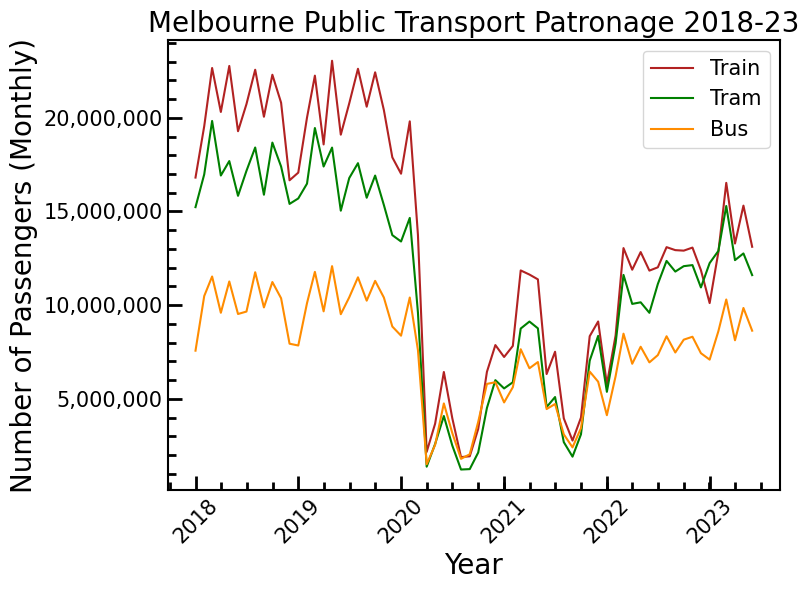

In [10]:
# Convert the string numbers with commas to integers
for column in public_trasport_df.iloc[:,3:]:
    public_trasport_df[column] = public_trasport_df[column].str.replace(',', '').astype(int)
    
#Create a combined time column
public_trasport_df["Time"]=pd.to_datetime(public_trasport_df[["Year","Month"]].assign(DAY=1))

def comma_formatter(x, pos):
    return '{:,.0f}'.format(x)

#Plotting - Only for metro Melbounre
plt.figure(figsize=(8, 6))

plt.plot(public_trasport_df["Time"],public_trasport_df["Metropolitan train"],label="Train", color='firebrick')
plt.plot(public_trasport_df["Time"],public_trasport_df["Metropolitan tram"],label="Tram", color='green')
plt.plot(public_trasport_df["Time"],public_trasport_df["Metropolitan bus"],label="Bus", color='darkorange')

plt.title('Melbourne Public Transport Patronage 2018-23',fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Passengers (Monthly)', fontsize=20)
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(comma_formatter))

#plt.figure(figsize=(9,7))
plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.50

plt.xticks(rotation=45)
plt.legend(loc="upper right", fontsize=15)
plt.tight_layout()
plt.savefig("Images/PTV_MonthlyPassengerFootfall.png")
plt.show()

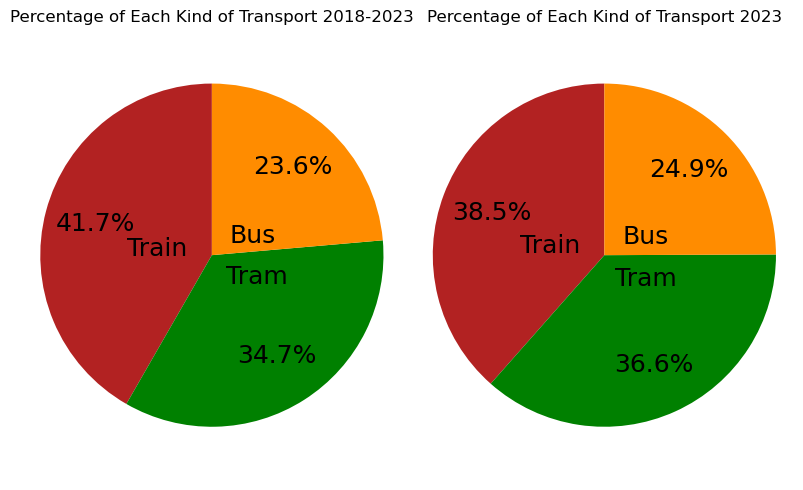

In [11]:
# Summing up the total for each transport mode

mode_total = public_trasport_df.loc[:,["Metropolitan train", "Metropolitan tram", "Metropolitan bus"]].sum()
mode_2023  = public_trasport_df.loc[public_trasport_df["Year"]==2023,["Metropolitan train", "Metropolitan tram", "Metropolitan bus"]].sum()

# Sort the dataframe in descending order
sorted_mode_total = mode_total.sort_values(ascending=False)
sorted_mode_2023 = mode_2023.sort_values(ascending=False)

# Plotting the pie chart
fig, ax = plt.subplots(1, 2, figsize=(8, 5))
colors = ['firebrick','green', 'darkorange']
labels = ['Train','Tram', 'Bus']
ax[0].pie(sorted_mode_total, labels=labels,colors=colors,rotatelabels=False,autopct='%1.1f%%',
      labeldistance =.15,pctdistance=0.70,startangle=90,textprops=dict(size=18))
ax[1].pie(sorted_mode_2023, labels=labels,colors=colors,rotatelabels=False,autopct='%1.1f%%',
      labeldistance =.15,pctdistance=0.70,startangle=90,textprops=dict(size=18))

ax[0].set_title("Percentage of Each Kind of Transport 2018-2023")
ax[1].set_title("Percentage of Each Kind of Transport 2023")

ax[0].axis('equal')  # Ensure the pie is drawn as a circle.
ax[1].axis('equal')  # Ensure the pie is drawn as a circle.

plt.tight_layout()
plt.savefig("Images/PTV_TotalAnnual_2Pie.png")
plt.show()

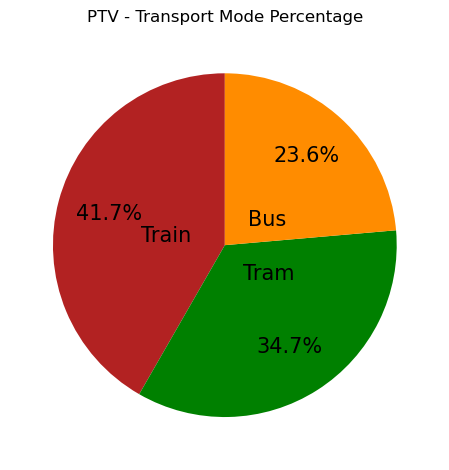

In [12]:
# Plotting the pie chart
colors = ['firebrick','green', 'darkorange']
labels = ['Train','Tram', 'Bus']
plt.pie(sorted_mode_total, labels=labels,colors=colors,rotatelabels=False,autopct='%1.1f%%',
      labeldistance =.2,pctdistance=0.70,startangle=90,textprops=dict(size=15))
plt.title('PTV - Transport Mode Percentage')
plt.tight_layout()
plt.savefig("Images/PTV_TotalAnnual_1Pie.png")
plt.show()

In [13]:
# Import all CSV Train files
joined_files = os.path.join("Resources/", "Train*.csv") 
#print(joined_files)
  
# List all CSV Train files
joined_list  = sorted(glob.glob(joined_files))
#print(joined_list)
  
# Concat all CSV Train files
df           = pd.concat(map(pd.read_csv, joined_list), axis = 1) 
df           = df.fillna(0)
#print(df) 

# Display the data table for preview
df.head(100)

,_id,Fin_year,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual,Pax_weekday,Pax_norm_weekday,Pax_sch_hol_weekday,...,Pax_weekday,Pax_norm_weekday,Pax_sch_hol_weekday,Pax_Saturday,Pax_Sunday,Pax_pre_AM_peak,Pax_AM_peak,Pax_interpeak,Pax_PM_peak,Pax_PM_late
0,1.0,FY18-19,19827.0,Stony Point,-38.374235,145.221837,5400.0,50.0,50.0,50.0,...,50,50,50,50,50,50,50,50,50,50
1,2.0,FY18-19,19828.0,Crib Point,-38.366123,145.204043,17900.0,50.0,50.0,50.0,...,50,50,50,50,50,50,50,50,50,50
2,3.0,FY18-19,19829.0,Morradoo,-38.354033,145.189603,5650.0,50.0,50.0,50.0,...,50,50,50,50,50,50,50,50,50,50
3,4.0,FY18-19,19830.0,Bittern,-38.337390,145.178026,14800.0,50.0,50.0,50.0,...,50,50,50,50,50,50,50,50,50,50
4,5.0,FY18-19,19831.0,Hastings,-38.305659,145.185980,21900.0,50.0,50.0,50.0,...,50,50,50,50,50,50,50,50,50,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,FY18-19,19928.0,Westgarth,-37.780621,144.999233,298000.0,1000.0,1000.0,850.0,...,250,250,200,200,150,50,100,50,50,50
96,97.0,FY18-19,19929.0,Dennis,-37.779187,145.008242,389350.0,1350.0,1400.0,1150.0,...,550,600,400,400,300,50,300,100,100,50
97,98.0,FY18-19,19930.0,Fairfield,-37.779171,145.016905,616150.0,2050.0,2150.0,1800.0,...,750,800,550,450,300,50,450,150,150,50
98,99.0,FY18-19,19931.0,Alphington,-37.778394,145.031255,296900.0,1050.0,1100.0,800.0,...,1250,1350,950,900,750,50,650,250,300,50


In [14]:
# List of all columns
list(df.columns.values)

['_id',
 'Fin_year',
 'Stop_ID',
 'Stop_name',
 'Stop_lat',
 'Stop_long',
 'Pax_annual',
 'Pax_weekday',
 'Pax_norm_weekday',
 'Pax_sch_hol_weekday',
 'Pax_Saturday',
 'Pax_Sunday',
 'Pax_pre_AM_peak',
 'Pax_AM_peak',
 'Pax_interpeak',
 'Pax_PM_peak',
 'Pax_PM_late',
 '_id',
 'Fin_year',
 'Stop_ID',
 'Stop_name',
 'Stop_lat',
 'Stop_long',
 'Pax_annual',
 'Pax_weekday',
 'Pax_norm_weekday',
 'Pax_sch_hol_weekday',
 'Pax_Saturday',
 'Pax_Sunday',
 'Pax_pre_AM_peak',
 'Pax_AM_peak',
 'Pax_interpeak',
 'Pax_PM_peak',
 'Pax_PM_late',
 '_id',
 'Fin_year',
 'Stop_ID',
 'Stop_name',
 'Stop_lat',
 'Stop_long',
 'Pax_annual',
 'Pax_weekday',
 'Pax_norm_weekday',
 'Pax_sch_hol_weekday',
 'Pax_Saturday',
 'Pax_Sunday',
 'Pax_pre_AM_peak',
 'Pax_AM_peak',
 'Pax_interpeak',
 'Pax_PM_peak',
 'Pax_PM_late',
 '_id',
 'Fin_year',
 'Stop_ID',
 'Stop_name',
 'Stop_lat',
 'Stop_long',
 'Pax_annual',
 'Pax_weekday',
 'Pax_norm_weekday',
 'Pax_sch_hol_weekday',
 'Pax_Saturday',
 'Pax_Sunday',
 'Pax_pre_AM_p

In [15]:
# Rename columns
df.columns = ['_idr', 'year1819', 'Stop_ID', 'Stop_name', 'Stop_lat', 'Stop_long', 'Pax_annual1819', 'Pax_weekday1819', 
              'Pax_norm_weekday1819', 'Pax_sch_hol_weekday1819', 'Pax_Saturday1819', 'Pax_Sunday1819', 'Pax_pre_AM_peak1819', 
              'Pax_AM_peak1819', 'Pax_interpeak1819', 'Pax_PM_peak1819', 'Pax_PM_late1819',
              '_idr', 'year1920', 'Stop_IDr', 'Stop_namer', 'Stop_latr', 'Stop_longr', 'Pax_annual1920', 'Pax_weekday1920', 
              'Pax_norm_weekday1920', 'Pax_sch_hol_weekday1920', 'Pax_Saturday1920', 'Pax_Sunday1920', 'Pax_pre_AM_peak1920', 
              'Pax_AM_peak1920', 'Pax_interpeak1920', 'Pax_PM_peak1920', 'Pax_PM_late1920',
              '_idr', 'year2021', 'Stop_IDr', 'Stop_namer', 'Stop_latr', 'Stop_longr', 'Pax_annual2021', 'Pax_weekday2021', 
              'Pax_norm_weekday2021', 'Pax_sch_hol_weekday2021', 'Pax_Saturday2021', 'Pax_Sunday2021', 'Pax_pre_AM_peak2021', 
              'Pax_AM_peak2021', 'Pax_interpeak2021', 'Pax_PM_peak2021', 'Pax_PM_late2021',
              '_idr', 'year2122', 'Stop_IDr', 'Stop_namer', 'Stop_latr', 'Stop_longr', 'Pax_annual2122', 'Pax_weekday2122', 
              'Pax_norm_weekday2122', 'Pax_sch_hol_weekday2122', 'Pax_Saturday2122', 'Pax_Sunday2122', 'Pax_pre_AM_peak2122', 
              'Pax_AM_peak2122', 'Pax_interpeak2122', 'Pax_PM_peak2122', 'Pax_PM_late2122',
              '_idr', 'year2223', 'Stop_IDr', 'Stop_namer', 'Stop_latr', 'Stop_longr', 'Pax_annual2223', 'Pax_weekday2223', 
              'Pax_norm_weekday2223', 'Pax_sch_hol_weekday2223', 'Pax_Saturday2223', 'Pax_Sunday2223', 'Pax_pre_AM_peak2223', 
              'Pax_AM_peak2223', 'Pax_interpeak2223', 'Pax_PM_peak2223', 'Pax_PM_late2223']

In [16]:
# Drop duplicate columns
duplicate_cols  = df.columns[df.columns.duplicated()]
df.drop(columns = duplicate_cols, inplace=True)
list(df.columns.values)

['year1819',
 'Stop_ID',
 'Stop_name',
 'Stop_lat',
 'Stop_long',
 'Pax_annual1819',
 'Pax_weekday1819',
 'Pax_norm_weekday1819',
 'Pax_sch_hol_weekday1819',
 'Pax_Saturday1819',
 'Pax_Sunday1819',
 'Pax_pre_AM_peak1819',
 'Pax_AM_peak1819',
 'Pax_interpeak1819',
 'Pax_PM_peak1819',
 'Pax_PM_late1819',
 'year1920',
 'Pax_annual1920',
 'Pax_weekday1920',
 'Pax_norm_weekday1920',
 'Pax_sch_hol_weekday1920',
 'Pax_Saturday1920',
 'Pax_Sunday1920',
 'Pax_pre_AM_peak1920',
 'Pax_AM_peak1920',
 'Pax_interpeak1920',
 'Pax_PM_peak1920',
 'Pax_PM_late1920',
 'year2021',
 'Pax_annual2021',
 'Pax_weekday2021',
 'Pax_norm_weekday2021',
 'Pax_sch_hol_weekday2021',
 'Pax_Saturday2021',
 'Pax_Sunday2021',
 'Pax_pre_AM_peak2021',
 'Pax_AM_peak2021',
 'Pax_interpeak2021',
 'Pax_PM_peak2021',
 'Pax_PM_late2021',
 'year2122',
 'Pax_annual2122',
 'Pax_weekday2122',
 'Pax_norm_weekday2122',
 'Pax_sch_hol_weekday2122',
 'Pax_Saturday2122',
 'Pax_Sunday2122',
 'Pax_pre_AM_peak2122',
 'Pax_AM_peak2122',
 'Pax

In [17]:
# Define function to calculate distance from flinders street station to respective stations/councils using lat & long
# Coordinates for flinders street: Lat : -37.81830513

def Dist(lat1, lon1, lat2, lon2):
    R = 6371                           # Radius of the earth in km
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    a = math.sin(dLat / 2) * math.sin(dLat / 2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dLon / 2) * math.sin(dLon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c                          # Distance in km
    return d

In [20]:
#Flinders st coordinates

flinders_lat    = df.loc[(df['Stop_name'] == 'Flinders Street'), 'Stop_lat']
flinders_long   = df.loc[(df['Stop_name'] == 'Flinders Street'), 'Stop_long']
print(flinders_lat, flinders_long)

213   -37.818305
Name: Stop_lat, dtype: float64 213    144.966964
Name: Stop_long, dtype: float64


In [21]:
# Calculate various values
df['Distance']      = df.apply(lambda row: Dist(row['Stop_lat'], row['Stop_long'], flinders_lat, flinders_long), axis=1)
df['TotalAnnual']   = df['Pax_annual1819']+df['Pax_annual1920']+df['Pax_annual2021']+df['Pax_annual2122']+df['Pax_annual2223']
df['TotalAMPeak']   = df['Pax_AM_peak1819']+df['Pax_AM_peak1920']+df['Pax_AM_peak2021']+df['Pax_AM_peak2122']+df['Pax_AM_peak2223']
df['TotalPMPeak']   = df['Pax_PM_peak1819']+df['Pax_PM_peak1920']+df['Pax_PM_peak2021']+df['Pax_PM_peak2122']+df['Pax_PM_peak2223']
df['TotalWeekday']  = df['Pax_norm_weekday1819']+df['Pax_norm_weekday1920']+df['Pax_norm_weekday2021']+df['Pax_norm_weekday2122']+df['Pax_norm_weekday2223']
df['TotalWeekend']  = df['Pax_Saturday1819']+df['Pax_Saturday1920']+df['Pax_Saturday2021']+df['Pax_Saturday2122']+df['Pax_Saturday2223']+df['Pax_Sunday1819']+df['Pax_Sunday1920']+df['Pax_Sunday2021']+df['Pax_Sunday2122']+df['Pax_Sunday2223']
df['TotalOffpeak']  = df['Pax_pre_AM_peak1819']+df['Pax_pre_AM_peak1920']+df['Pax_pre_AM_peak2021']+df['Pax_pre_AM_peak2122']+df['Pax_pre_AM_peak2223']+df['Pax_interpeak1819']+df['Pax_interpeak1920']+df['Pax_interpeak2021']+df['Pax_interpeak2122']+df['Pax_interpeak2223']++df['Pax_PM_late1819']+df['Pax_PM_late1920']+df['Pax_PM_late2021']+df['Pax_PM_late2122']+df['Pax_PM_late2223']

df['AnnualPerIncrease']     = (df['Pax_annual2223']/df['Pax_annual1819'])*100
df['TotalAMPeakIncrease']   = (df['Pax_AM_peak2223']/df['Pax_AM_peak1819'])*100
df['TotalPMPeakIncrease']   = (df['Pax_PM_peak2223']/df['Pax_PM_peak2223'])*100
df['TotalOffPeakIncrease']  = ( (df['Pax_pre_AM_peak1819']+df['Pax_interpeak1819']+df['Pax_PM_late1819']) / (df['Pax_pre_AM_peak2223']+df['Pax_interpeak2223']+df['Pax_PM_late2223']) )*100
list(df.columns.values)

/var/folders/wn/pfb13k1x40zdws69rny8gn700000gn/T/ipykernel_76238/3367225421.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dLat = math.radians(lat2 - lat1)
/var/folders/wn/pfb13k1x40zdws69rny8gn700000gn/T/ipykernel_76238/3367225421.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dLon = math.radians(lon2 - lon1)
/var/folders/wn/pfb13k1x40zdws69rny8gn700000gn/T/ipykernel_76238/3367225421.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  * math.cos(math.radians(lat2)) * math.sin(dLon / 2) * math.sin(dLon / 2)


['year1819',
 'Stop_ID',
 'Stop_name',
 'Stop_lat',
 'Stop_long',
 'Pax_annual1819',
 'Pax_weekday1819',
 'Pax_norm_weekday1819',
 'Pax_sch_hol_weekday1819',
 'Pax_Saturday1819',
 'Pax_Sunday1819',
 'Pax_pre_AM_peak1819',
 'Pax_AM_peak1819',
 'Pax_interpeak1819',
 'Pax_PM_peak1819',
 'Pax_PM_late1819',
 'year1920',
 'Pax_annual1920',
 'Pax_weekday1920',
 'Pax_norm_weekday1920',
 'Pax_sch_hol_weekday1920',
 'Pax_Saturday1920',
 'Pax_Sunday1920',
 'Pax_pre_AM_peak1920',
 'Pax_AM_peak1920',
 'Pax_interpeak1920',
 'Pax_PM_peak1920',
 'Pax_PM_late1920',
 'year2021',
 'Pax_annual2021',
 'Pax_weekday2021',
 'Pax_norm_weekday2021',
 'Pax_sch_hol_weekday2021',
 'Pax_Saturday2021',
 'Pax_Sunday2021',
 'Pax_pre_AM_peak2021',
 'Pax_AM_peak2021',
 'Pax_interpeak2021',
 'Pax_PM_peak2021',
 'Pax_PM_late2021',
 'year2122',
 'Pax_annual2122',
 'Pax_weekday2122',
 'Pax_norm_weekday2122',
 'Pax_sch_hol_weekday2122',
 'Pax_Saturday2122',
 'Pax_Sunday2122',
 'Pax_pre_AM_peak2122',
 'Pax_AM_peak2122',
 'Pax

In [22]:
# Import CSV files for Melbounre's metro stations
ds           = pd.read_csv("Resources/StationList.csv")

# Merge CSV files for metro stations and passenger footfall
dp           = pd.merge(ds, df, how="right", on=["Stop_name"])
#print(dp)
dp           = dp.dropna()
#print(dp)
list(dp.columns.values)

['Zone',
 'Line name ',
 'Stop_name',
 'City council',
 'year1819',
 'Stop_ID',
 'Stop_lat',
 'Stop_long',
 'Pax_annual1819',
 'Pax_weekday1819',
 'Pax_norm_weekday1819',
 'Pax_sch_hol_weekday1819',
 'Pax_Saturday1819',
 'Pax_Sunday1819',
 'Pax_pre_AM_peak1819',
 'Pax_AM_peak1819',
 'Pax_interpeak1819',
 'Pax_PM_peak1819',
 'Pax_PM_late1819',
 'year1920',
 'Pax_annual1920',
 'Pax_weekday1920',
 'Pax_norm_weekday1920',
 'Pax_sch_hol_weekday1920',
 'Pax_Saturday1920',
 'Pax_Sunday1920',
 'Pax_pre_AM_peak1920',
 'Pax_AM_peak1920',
 'Pax_interpeak1920',
 'Pax_PM_peak1920',
 'Pax_PM_late1920',
 'year2021',
 'Pax_annual2021',
 'Pax_weekday2021',
 'Pax_norm_weekday2021',
 'Pax_sch_hol_weekday2021',
 'Pax_Saturday2021',
 'Pax_Sunday2021',
 'Pax_pre_AM_peak2021',
 'Pax_AM_peak2021',
 'Pax_interpeak2021',
 'Pax_PM_peak2021',
 'Pax_PM_late2021',
 'year2122',
 'Pax_annual2122',
 'Pax_weekday2122',
 'Pax_norm_weekday2122',
 'Pax_sch_hol_weekday2122',
 'Pax_Saturday2122',
 'Pax_Sunday2122',
 'Pax_pr

In [23]:
# Reorganise sequence of columns
dp = dp[[
 'Stop_name',
 'Line name ',
 'City council',
 'Zone',
 'Stop_ID',
 'Stop_lat',
 'Stop_long',
 'Distance',
 'TotalAnnual',
 'TotalAMPeak',
 'TotalPMPeak',
 'TotalWeekday',
 'TotalWeekend',
 'TotalOffpeak',
 'AnnualPerIncrease',
 'TotalAMPeakIncrease',
 'TotalPMPeakIncrease',
 'TotalOffPeakIncrease',
 'year1819',
 'Pax_annual1819',
 'Pax_weekday1819',
 'Pax_norm_weekday1819',
 'Pax_sch_hol_weekday1819',
 'Pax_Saturday1819',
 'Pax_Sunday1819',
 'Pax_pre_AM_peak1819',
 'Pax_AM_peak1819',
 'Pax_interpeak1819',
 'Pax_PM_peak1819',
 'Pax_PM_late1819',
 'year1920',
 'Pax_annual1920',
 'Pax_weekday1920',
 'Pax_norm_weekday1920',
 'Pax_sch_hol_weekday1920',
 'Pax_Saturday1920',
 'Pax_Sunday1920',
 'Pax_pre_AM_peak1920',
 'Pax_AM_peak1920',
 'Pax_interpeak1920',
 'Pax_PM_peak1920',
 'Pax_PM_late1920',
 'year2021',
 'Pax_annual2021',
 'Pax_weekday2021',
 'Pax_norm_weekday2021',
 'Pax_sch_hol_weekday2021',
 'Pax_Saturday2021',
 'Pax_Sunday2021',
 'Pax_pre_AM_peak2021',
 'Pax_AM_peak2021',
 'Pax_interpeak2021',
 'Pax_PM_peak2021',
 'Pax_PM_late2021',
 'year2122',
 'Pax_annual2122',
 'Pax_weekday2122',
 'Pax_norm_weekday2122',
 'Pax_sch_hol_weekday2122',
 'Pax_Saturday2122',
 'Pax_Sunday2122',
 'Pax_pre_AM_peak2122',
 'Pax_AM_peak2122',
 'Pax_interpeak2122',
 'Pax_PM_peak2122',
 'Pax_PM_late2122',
 'year2223',
 'Pax_annual2223',
 'Pax_weekday2223',
 'Pax_norm_weekday2223',
 'Pax_sch_hol_weekday2223',
 'Pax_Saturday2223',
 'Pax_Sunday2223',
 'Pax_pre_AM_peak2223',
 'Pax_AM_peak2223',
 'Pax_interpeak2223',
 'Pax_PM_peak2223',
 'Pax_PM_late2223'
 ]]

In [24]:
# Oragnise dataframe as per annual passenger footfall and save csv file
dp  = dp.sort_values(by='TotalAnnual', ascending=False)
dp.to_csv('MetroFootfall.csv')

In [25]:
# Create group of metro stations by council areas
dm = dp.groupby(["City council"])
dm.count().head(50)

,Stop_name,Line name,Zone,Stop_ID,Stop_lat,Stop_long,Distance,TotalAnnual,TotalAMPeak,TotalPMPeak,...,Pax_weekday2223,Pax_norm_weekday2223,Pax_sch_hol_weekday2223,Pax_Saturday2223,Pax_Sunday2223,Pax_pre_AM_peak2223,Pax_AM_peak2223,Pax_interpeak2223,Pax_PM_peak2223,Pax_PM_late2223
City council,,,,,,,,,,,,,,,,,,,,,
Banyule C,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Bayside C,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
Boroondara C,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
Brimbank C,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
Cardinia S,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Casey C,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
Darebin C,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
Frankston C,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Glen Eira C,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


In [26]:
#Create a summary table

Mean_C         = dm[["Distance", 'Stop_lat', 'Stop_long']].mean()
Sum_C          = dm[['TotalAnnual', 'TotalAMPeak', 'TotalPMPeak', 'TotalWeekday', 'TotalWeekend', 'TotalOffpeak', 
                    "Pax_annual2223", "Pax_annual1819", 'Pax_AM_peak2223', 'Pax_AM_peak1819', 'Pax_PM_peak2223', 
                    'Pax_PM_peak1819', 'Pax_Saturday2223', 'Pax_Sunday2223', 'Pax_Saturday1819', 'Pax_Sunday1819',
                    'Pax_pre_AM_peak2223', 'Pax_interpeak2223','Pax_PM_late2223', 'Pax_pre_AM_peak1819', 
                    'Pax_interpeak1819','Pax_PM_late1819', 'Pax_norm_weekday2223', 'Pax_norm_weekday1819']].sum()

Summary        = pd.merge(Mean_C, Sum_C, how="left", on=["City council"])

Summary["TotalIncrease(%)"]      = (Summary["Pax_annual2223"]/Summary["Pax_annual1819"])*100
Summary["WeekdayIncrease(%)"]    = (Summary["Pax_norm_weekday2223"]/Summary["Pax_norm_weekday1819"])*100
Summary["AMIncrease(%)"]         = (Summary["Pax_AM_peak2223"]/Summary["Pax_AM_peak1819"])*100
Summary["PMIncrease(%)"]         = (Summary["Pax_PM_peak2223"]/Summary["Pax_PM_peak1819"])*100
Summary["OffPeakIncrease(%)"]    = ( (Summary['Pax_pre_AM_peak2223']+Summary['Pax_interpeak2223']+Summary['Pax_PM_late2223']) 
                                    / (Summary['Pax_pre_AM_peak1819']+Summary['Pax_interpeak1819']+Summary['Pax_PM_late1819']) )*100
Summary["WeekendIncrease(%)"] = ( (Summary['Pax_Saturday2223']+Summary['Pax_Sunday2223']) 
                                    / (Summary['Pax_Saturday1819']+Summary['Pax_Sunday1819']) )*100

Summary.drop(["Pax_annual2223", "Pax_annual1819", 'Pax_AM_peak2223', 'Pax_AM_peak1819', 'Pax_PM_peak2223', 
              'Pax_PM_peak1819', 'Pax_Saturday2223', 'Pax_Sunday2223', 'Pax_Saturday1819', 'Pax_Sunday1819',
              'Pax_pre_AM_peak2223', 'Pax_interpeak2223','Pax_PM_late2223', 'Pax_pre_AM_peak1819', 
              'Pax_interpeak1819','Pax_PM_late1819', 'Pax_norm_weekday2223', 'Pax_norm_weekday1819'], axis=1, inplace=True)

print(Summary.sort_values(['TotalAnnual'], ascending=False))

                           Distance   Stop_lat   Stop_long  TotalAnnual  \
City council                                                              
Melbourne C                2.571549 -37.811022  144.956476  199105700.0   
Whittlesea C              21.002612 -37.645334  145.059864   40508650.0   
Yarra C                    3.099026 -37.808771  144.994970   38622700.0   
Monash C                  15.748572 -37.891943  145.117603   33914850.0   
Boroondara C               9.023778 -37.835384  145.066073   26341800.0   
Glen Eira C               10.860237 -37.897642  145.035702   24589800.0   
Hume C                    21.702833 -37.643927  144.879278   23938450.0   
Maribyrnong C              7.113931 -37.804917  144.888091   23513450.0   
Stonnington C              7.831031 -37.856243  145.041290   23360800.0   
Darebin C                  8.325017 -37.751181  145.005097   22618650.0   
Bayside C                 14.183177 -37.938111  145.019598   19655550.0   
Brimbank C               

In [27]:
Summary.to_csv("Resources/Summary.csv")

#Install if required
conda install -c pyviz geoviews

In [28]:
 # Import the required libraries
import hvplot.pandas
import pandas as pd

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

#Install if required
conda install selenium

#Install if required
conda install -c conda-forge firefox geckodriver

In [29]:
from matplotlib.colors import LinearSegmentedColormap
colors  = ['green', 'darkorange', 'firebrick'] 
cm      = LinearSegmentedColormap.from_list("Custom", colors, N=100)

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 10.50
plt.figure(figsize=(100,100))
m1 = df.hvplot.points(x='Stop_long', y='Stop_lat', geo = True, tiles = "OSM", marker='circle', size=df["TotalWeekday"]/150, cmap=cm, color=df["TotalWeekday"]/150, line_width=1,
                       xlim=(144.6, 145.51), ylim=(-37.55, -38.2), alpha=10000000.0, frame_height=1000, label='Metro Station', fontsize=18, xlabel="Longitude", ylabel="Latitude").opts(bgcolor="black") 
m1
#hvplot.save(m1, 'Metro_hvplot.png')
#hvplot.save(m1, 'Metro_hvplot.html')

:Overlay
   .Tiles.I              :Tiles   [x,y]
   .Points.Metro_Station :Points   [Stop_long,Stop_lat]   (_color,_size)

<Figure size 10000x10000 with 0 Axes>

In [53]:
Summary = pd.read_csv('Resources/Summary.csv')

In [54]:
Summary.head()

,City council,Distance,Stop_lat,Stop_long,TotalAnnual,TotalAMPeak,TotalPMPeak,TotalWeekday,TotalWeekend,TotalOffpeak,TotalIncrease(%),WeekdayIncrease(%),AMIncrease(%),PMIncrease(%),OffPeakIncrease(%),WeekendIncrease(%)
0,Banyule C,13.392110,-37.737717,145.079519,16823150.0,26600.0,13450.0,59200.0,49850.0,20300.0,57.926785,55.696203,51.010101,77.142857,55.905512,80.970149
1,Bayside C,14.183177,-37.938111,145.019598,19655550.0,28450.0,13250.0,63400.0,70800.0,21850.0,66.655851,63.020833,63.793103,64.285714,62.992126,79.283887
2,Boroondara C,9.023778,-37.835384,145.066073,26341800.0,31350.0,33400.0,94000.0,74000.0,32300.0,66.560298,64.860427,60.280374,64.788732,74.331551,80.906921
3,Brimbank C,16.208247,-37.749828,144.805854,19624650.0,29200.0,10750.0,66650.0,60750.0,26700.0,50.600815,49.802372,51.304348,51.282051,48.979592,54.838710
4,Cardinia S,48.815247,-38.067220,145.425308,5640200.0,9100.0,3100.0,20550.0,14150.0,8950.0,149.974356,138.541667,158.536585,138.461538,120.930233,196.296296


In [55]:
print(Summary["City council"])

0                  Banyule C  
1                  Bayside C  
2               Boroondara C  
3                 Brimbank C  
4                 Cardinia S  
5                    Casey C  
6                  Darebin C  
7                Frankston C  
8                Glen Eira C  
9        Greater Dandenong C  
10             Hobsons Bay C  
11                    Hume C  
12                Kingston C  
13                    Knox C  
14             Maribyrnong C  
15               Maroondah C  
16               Melbourne C  
17                 Merry-bek C
18                Merry-bek C 
19               Merry-bek C  
20                  Monash C  
21           Moonee Valley C  
22    Mornington Peninsula S  
23               Nillumbik S  
24            Port Phillip C  
25             Stonnington C  
26              Whitehorse C  
27              Whittlesea C  
28                 Wyndham C  
29                   Yarra C  
30            Yarra Ranges S  
Name: City council, dtype: object


In [56]:
from matplotlib.colors import LinearSegmentedColormap
colors  = ['green', 'darkorange', 'firebrick'] 
cm      = LinearSegmentedColormap.from_list("Custom", colors, N=100)

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 10.50
plt.figure(figsize=(100,100))
m2 = Summary.hvplot.points(x='Stop_long', y='Stop_lat', geo = True, tiles = "OSM", marker='circle', size=Summary["TotalWeekday"]/100, cmap=cm, color=Summary["TotalWeekday"]/100, line_width=1,
                       xlim=(144.6, 145.51), ylim=(-37.55, -38.2), alpha=10000000.0, frame_height=1000, label='Metro Station', fontsize=18, xlabel="Longitude", ylabel="Latitude").opts(bgcolor="black") 
m2
#hvplot.save(m1, 'Metro_hvplot.png')
#hvplot.save(m1, 'Metro_hvplot.html')

:Overlay
   .Tiles.I              :Tiles   [x,y]
   .Points.Metro_Station :Points   [Stop_long,Stop_lat]   (_color,_size)

<Figure size 10000x10000 with 0 Axes>

In [57]:
#Loading house data from csv
house_df = pd.read_csv("Resources/Year_SummaryV2021.csv", encoding='ISO-8859-1')
house_df

,Melbourne Metropolitan Area,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Residential price statistics 1992 to 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,House Median,NaN,NaN,NaN,NaN,NaN,Unit/Apartment Median,NaN,NaN,NaN,NaN,Vacant House Block Median,NaN,NaN,NaN,NaN
2,NaN,NaN,Houses,NaN,NaN,NaN,Units/Apartments,NaN,NaN,NaN,NaN,Vacant House Blocks,NaN,NaN,NaN,NaN
3,Year,No. of Sales,Median Price,NaN,Mean Price,NaN,No. of Sales,Median Price,NaN,Mean Price,NaN,No. of Sales,Median Price,NaN,Mean Price,NaN
4,1992,"41,212","125,000",NaN,"150,106",NaN,"15,130","110,000",NaN,"133,910",NaN,"12,924","45,000",NaN,"52,976",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9190,Industrial Total,10,NaN,NaN,NaN,NaN,NaN,Industrial Total Prices,NaN,NaN,NaN,"$1,764,000",NaN,NaN,NaN,NaN
9191,"National Parks, etc Total",1,NaN,NaN,NaN,NaN,NaN,"National Parks, etc Total Prices",NaN,NaN,NaN,"$111,500",NaN,NaN,NaN,NaN
9192,Primary Production Total,33,NaN,NaN,NaN,NaN,NaN,Primary Production Total Prices,NaN,NaN,NaN,"$41,398,067",NaN,NaN,NaN,NaN
9193,Residential Total,231,NaN,NaN,NaN,NaN,NaN,Residential Total Prices,NaN,NaN,NaN,"$32,265,245",NaN,NaN,NaN,NaN


In [58]:
house_df.columns

Index(['Melbourne Metropolitan Area', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

In [59]:
# Dropping columns not needed
house_df=house_df.drop(["Unnamed: 3","Unnamed: 5","Unnamed: 8","Unnamed: 10","Unnamed: 3","Unnamed: 8","Unnamed: 10","Unnamed: 13","Unnamed: 15"], axis=1)
house_df

,Melbourne Metropolitan Area,Unnamed: 1,Unnamed: 2,Unnamed: 4,Unnamed: 6,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 12,Unnamed: 14
0,Residential price statistics 1992 to 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,House Median,NaN,NaN,NaN,Unit/Apartment Median,NaN,NaN,Vacant House Block Median,NaN,NaN
2,NaN,NaN,Houses,NaN,Units/Apartments,NaN,NaN,Vacant House Blocks,NaN,NaN
3,Year,No. of Sales,Median Price,Mean Price,No. of Sales,Median Price,Mean Price,No. of Sales,Median Price,Mean Price
4,1992,"41,212","125,000","150,106","15,130","110,000","133,910","12,924","45,000","52,976"
...,...,...,...,...,...,...,...,...,...,...
9190,Industrial Total,10,NaN,NaN,NaN,Industrial Total Prices,NaN,"$1,764,000",NaN,NaN
9191,"National Parks, etc Total",1,NaN,NaN,NaN,"National Parks, etc Total Prices",NaN,"$111,500",NaN,NaN
9192,Primary Production Total,33,NaN,NaN,NaN,Primary Production Total Prices,NaN,"$41,398,067",NaN,NaN
9193,Residential Total,231,NaN,NaN,NaN,Residential Total Prices,NaN,"$32,265,245",NaN,NaN


In [60]:
#Rename Columns
# Step 1: Create new headers
#new_headers = ["Col1", "House Number of Sales","House Median Price","House Mean Price","Unit/Apartment Number of Sales","Unit/Apartment Median Price","Unit/Apartment Mean Price", "Vacant House Number of Sales","Vacant House Median Price","Vacant House Mean Price"]

house_df.columns = ["Col1", "House Number of Sales","House Median Price","House Mean Price",
                    "Unit/Apartment Number of Sales","Unit/Apartment Median Price","Unit/Apartment Mean Price",
                    "Vacant House Number of Sales","Vacant House Median Price","Vacant House Mean Price"]
house_df.columns

Index(['Col1', 'House Number of Sales', 'House Median Price',
       'House Mean Price', 'Unit/Apartment Number of Sales',
       'Unit/Apartment Median Price', 'Unit/Apartment Mean Price',
       'Vacant House Number of Sales', 'Vacant House Median Price',
       'Vacant House Mean Price'],
      dtype='object')

In [61]:
house_df["Col1"].unique()

array(['Residential price statistics 1992 to 2022', 'House Median', nan,
       'Year', '1992 ', '1993 ', '1994 ', '1995 ', '1996 ', '1997 ',
       '1998 ', '1999 ', '2000 ', '2001 ', '2002 ', '2003 ', '2004 ',
       '2005 ', '2006 ', '2007 ', '2008 ', '2009 ', '2010 ', '2011 ',
       '2012 ', '2013 ', '2014 ', '2015 ', '2016 ', '2017 ', '2018 ',
       '2019 ', '2020 ', '2021 ', '2022 ',
       'Statistics for 2022 are based on a small number of sales and are preliminary only.',
       'MELBOURNE METROPOLITAN AREA',
       'Analysis of property sales for 2021', 'Land Use', 'Commercial',
       'Advertising Sign Uns', 'Amusement Parks etc.', 'Bank',
       'Bed and Breakfast', 'Bottle Shop/Licensed', 'Brothel', 'Caf\x8e',
       'Car Wash', 'CarPark Ð OpenAir', 'CarPark Ð UnderCover',
       'Cinema Complex', 'Com Land (Struct 0)', 'ConferenceConvention',
       'Convenience/FastFood', 'Crematorium/Funeral', 'Dental Clinic',
       'Dev Site', 'Display Yard', 'Drive-in', 'Fuel Outle

In [62]:
# putting all data of rows in first column into a list
rows = house_df["Col1"].unique().tolist()
rows

['Residential price statistics 1992 to 2022',
 'House Median',
 nan,
 'Year',
 '1992 ',
 '1993 ',
 '1994 ',
 '1995 ',
 '1996 ',
 '1997 ',
 '1998 ',
 '1999 ',
 '2000 ',
 '2001 ',
 '2002 ',
 '2003 ',
 '2004 ',
 '2005 ',
 '2006 ',
 '2007 ',
 '2008 ',
 '2009 ',
 '2010 ',
 '2011 ',
 '2012 ',
 '2013 ',
 '2014 ',
 '2015 ',
 '2016 ',
 '2017 ',
 '2018 ',
 '2019 ',
 '2020 ',
 '2021 ',
 '2022 ',
 'Statistics for 2022 are based on a small number of sales and are preliminary only.',
 'MELBOURNE METROPOLITAN AREA',
 'Analysis of property sales for 2021',
 'Land Use',
 'Commercial',
 'Advertising Sign Uns',
 'Amusement Parks etc.',
 'Bank',
 'Bed and Breakfast',
 'Bottle Shop/Licensed',
 'Brothel',
 'Caf\x8e',
 'Car Wash',
 'CarPark Ð OpenAir',
 'CarPark Ð UnderCover',
 'Cinema Complex',
 'Com Land (Struct 0)',
 'ConferenceConvention',
 'Convenience/FastFood',
 'Crematorium/Funeral',
 'Dental Clinic',
 'Dev Site',
 'Display Yard',
 'Drive-in',
 'Fuel Outlet/Garage',
 'Ground Level Parking',
 'Health 

In [63]:
rows_council = [item for item in rows if isinstance(item, str) and ("Shire" in item or "City" in item or "Merri-Bec" in item or "Borough of Queenscliffe" in item)]

rows_council

['Alpine Shire',
 'Ararat Rural City',
 'Ballarat City',
 'Banyule City',
 'Bass Coast Shire',
 'Baw Baw Shire',
 'Bayside City',
 'Benalla Rural City',
 'Greater Bendigo City',
 'Boroondara City',
 'Brimbank City',
 'Buloke Shire',
 'Campaspe Shire',
 'Cardina Shire',
 'Casey City',
 'Central Goldfields Shire',
 'Colac Otway Shire',
 'Corangamite Shire',
 'Greater Dandenong City',
 'Darebin City',
 'East Gippsland Shire',
 'Frankston City',
 'Gannawarra Shire',
 'Greater Geelong City',
 'Glen Eira City',
 'Glenelg Shire',
 'Golden Plains Shire',
 'Hepburn Shire',
 'Hindmarsh Shire',
 'Hobsons Bay City',
 'Horsham Rural City',
 'Hume City',
 'Indigo Shire',
 'Kingston City',
 'Knox City',
 'Latrobe City',
 'Loddon Shire',
 'Macedon Ranges Shire',
 'Manningham City',
 'Mansfield Shire',
 'Maribyrnong City',
 'Maroondah City',
 'Melbourne City',
 'Melton City',
 'Mildura Rural City',
 'Mitchell Shire',
 'Moira Shire',
 'Monash City',
 'Moonee Valley City',
 'Moorabool Shire',
 'Moreland 

In [64]:
years        =['1992 ','1993 ','1994 ', '1995 ', '1996 ', '1997 ','1998 ', '1999 ', '2000 ', '2001 ', '2002 ', '2003 ', '2004 ', '2005 ', '2006 ', '2007 ', '2008 ', '2009 ', '2010 ', '2011 ', '2012 ', '2013 ', '2014 ', '2015 ','2016 ','2017 ','2018 ','2019 ','2020 ','2021 ','2022 ']
rows_to_keep =rows_council+years
rows_to_keep

['Alpine Shire',
 'Ararat Rural City',
 'Ballarat City',
 'Banyule City',
 'Bass Coast Shire',
 'Baw Baw Shire',
 'Bayside City',
 'Benalla Rural City',
 'Greater Bendigo City',
 'Boroondara City',
 'Brimbank City',
 'Buloke Shire',
 'Campaspe Shire',
 'Cardina Shire',
 'Casey City',
 'Central Goldfields Shire',
 'Colac Otway Shire',
 'Corangamite Shire',
 'Greater Dandenong City',
 'Darebin City',
 'East Gippsland Shire',
 'Frankston City',
 'Gannawarra Shire',
 'Greater Geelong City',
 'Glen Eira City',
 'Glenelg Shire',
 'Golden Plains Shire',
 'Hepburn Shire',
 'Hindmarsh Shire',
 'Hobsons Bay City',
 'Horsham Rural City',
 'Hume City',
 'Indigo Shire',
 'Kingston City',
 'Knox City',
 'Latrobe City',
 'Loddon Shire',
 'Macedon Ranges Shire',
 'Manningham City',
 'Mansfield Shire',
 'Maribyrnong City',
 'Maroondah City',
 'Melbourne City',
 'Melton City',
 'Mildura Rural City',
 'Mitchell Shire',
 'Moira Shire',
 'Monash City',
 'Moonee Valley City',
 'Moorabool Shire',
 'Moreland 

In [65]:
#filtering on rows that we need(years and council data
filtered_house_df=house_df[house_df["Col1"].isin(rows_to_keep) ]
# Making a csv file to have a look at the results
#filtered_house_df.to_csv('filtered-house.csv')

# Based on the csv file there is no need to first 93 rows as there is data for Melbourne and victoria ...
filtered_house_df=filtered_house_df.iloc[93:,:]
filtered_house_df.head(100)

,Col1,House Number of Sales,House Median Price,House Mean Price,Unit/Apartment Number of Sales,Unit/Apartment Median Price,Unit/Apartment Mean Price,Vacant House Number of Sales,Vacant House Median Price,Vacant House Mean Price
914,Alpine Shire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
919,1992,87,"78,000","89,478",33,"100,000","99,204",59,"30,000","34,372"
920,1993,109,"83,000","93,673",22,"83,000","84,384",44,"34,500","40,812"
921,1994,142,"84,000","94,228",23,"82,500","83,961",55,"33,000","37,935"
922,1995,106,"81,500","94,926",19,"91,500","100,239",83,"30,000","35,773"
...,...,...,...,...,...,...,...,...,...,...
1120,2020,"2,142","440,000","488,502",455,"315,000","327,217","1,876","194,900","202,109"
1121,2021,"2,474","530,000","588,140",486,"360,000","379,506","1,100","237,750","246,954"
1122,2022,413,"587,000","642,952",94,"416,000","427,706",81,"315,000","314,990"
1125,Ballarat City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# in Col1 there is year data and data for council name. we want to get the council names and assign them to a new column.
rows_council
new_col = []

prev_content = None
for content in filtered_house_df['Col1']:
    if content in rows_council:
        prev_content = content
        new_col.append(content)
    else:
        new_col.append(prev_content)

filtered_house_df['new_column'] = new_col
filtered_house_df
# Making a csv file to have a look at the results
#filtered_house_df.to_csv('filtered-house-2.csv')

,Col1,House Number of Sales,House Median Price,House Mean Price,Unit/Apartment Number of Sales,Unit/Apartment Median Price,Unit/Apartment Mean Price,Vacant House Number of Sales,Vacant House Median Price,Vacant House Mean Price,new_column
914,Alpine Shire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alpine Shire
919,1992,87,"78,000","89,478",33,"100,000","99,204",59,"30,000","34,372",Alpine Shire
920,1993,109,"83,000","93,673",22,"83,000","84,384",44,"34,500","40,812",Alpine Shire
921,1994,142,"84,000","94,228",23,"82,500","83,961",55,"33,000","37,935",Alpine Shire
922,1995,106,"81,500","94,926",19,"91,500","100,239",83,"30,000","35,773",Alpine Shire
...,...,...,...,...,...,...,...,...,...,...,...
9144,2019,126,"106,500","119,233",4,"122,000","131,000",29,"16,300","27,320",Yarriambiack Shire
9145,2020,153,"125,000","135,927",3,"175,000","177,000",27,"24,000","24,738",Yarriambiack Shire
9146,2021,159,"156,000","165,959",1,"300,000","300,000",36,"25,500","37,163",Yarriambiack Shire
9147,2022,32,"170,500","203,921",0,0,0,12,"33,750","36,833",Yarriambiack Shire


In [67]:
# Based on the csv file made in previus part, there are NaN in filtered_house_df that we want to remove them.
filtered_house_df.dropna(how='any', inplace=True)
filtered_house_df.head(5)

,Col1,House Number of Sales,House Median Price,House Mean Price,Unit/Apartment Number of Sales,Unit/Apartment Median Price,Unit/Apartment Mean Price,Vacant House Number of Sales,Vacant House Median Price,Vacant House Mean Price,new_column
919,1992,87,"78,000","89,478",33,"100,000","99,204",59,"30,000","34,372",Alpine Shire
920,1993,109,"83,000","93,673",22,"83,000","84,384",44,"34,500","40,812",Alpine Shire
921,1994,142,"84,000","94,228",23,"82,500","83,961",55,"33,000","37,935",Alpine Shire
922,1995,106,"81,500","94,926",19,"91,500","100,239",83,"30,000","35,773",Alpine Shire
923,1996,163,"85,000","101,134",45,"98,000","513,244",77,"40,000","58,349",Alpine Shire


In [68]:
for column in filtered_house_df.iloc[:, 1:10].columns:
    filtered_house_df[column] = filtered_house_df[column].str.replace(",", "").str.strip().astype(int)

filtered_house_df

,Col1,House Number of Sales,House Median Price,House Mean Price,Unit/Apartment Number of Sales,Unit/Apartment Median Price,Unit/Apartment Mean Price,Vacant House Number of Sales,Vacant House Median Price,Vacant House Mean Price,new_column
919,1992,87,78000,89478,33,100000,99204,59,30000,34372,Alpine Shire
920,1993,109,83000,93673,22,83000,84384,44,34500,40812,Alpine Shire
921,1994,142,84000,94228,23,82500,83961,55,33000,37935,Alpine Shire
922,1995,106,81500,94926,19,91500,100239,83,30000,35773,Alpine Shire
923,1996,163,85000,101134,45,98000,513244,77,40000,58349,Alpine Shire
...,...,...,...,...,...,...,...,...,...,...,...
9143,2018,159,102000,116636,2,172500,172500,27,16500,19445,Yarriambiack Shire
9144,2019,126,106500,119233,4,122000,131000,29,16300,27320,Yarriambiack Shire
9145,2020,153,125000,135927,3,175000,177000,27,24000,24738,Yarriambiack Shire
9146,2021,159,156000,165959,1,300000,300000,36,25500,37163,Yarriambiack Shire


In [69]:
# Rename columns , drop the old index, and replacing Merri-Bek

filtered_house_df=filtered_house_df.rename(columns={"new_column":"City Council_format2","Col1":"Year"})
filtered_house_df = filtered_house_df.reset_index(drop=True)
filtered_house_df.head(5)


filtered_house_df["Total Number of Sales"]=filtered_house_df["House Number of Sales"]+ filtered_house_df["Unit/Apartment Number of Sales"]+ filtered_house_df["Vacant House Number of Sales"]
filtered_house_df

,Year,House Number of Sales,House Median Price,House Mean Price,Unit/Apartment Number of Sales,Unit/Apartment Median Price,Unit/Apartment Mean Price,Vacant House Number of Sales,Vacant House Median Price,Vacant House Mean Price,City Council_format2,Total Number of Sales
0,1992,87,78000,89478,33,100000,99204,59,30000,34372,Alpine Shire,179
1,1993,109,83000,93673,22,83000,84384,44,34500,40812,Alpine Shire,175
2,1994,142,84000,94228,23,82500,83961,55,33000,37935,Alpine Shire,220
3,1995,106,81500,94926,19,91500,100239,83,30000,35773,Alpine Shire,208
4,1996,163,85000,101134,45,98000,513244,77,40000,58349,Alpine Shire,285
...,...,...,...,...,...,...,...,...,...,...,...,...
2475,2018,159,102000,116636,2,172500,172500,27,16500,19445,Yarriambiack Shire,188
2476,2019,126,106500,119233,4,122000,131000,29,16300,27320,Yarriambiack Shire,159
2477,2020,153,125000,135927,3,175000,177000,27,24000,24738,Yarriambiack Shire,183
2478,2021,159,156000,165959,1,300000,300000,36,25500,37163,Yarriambiack Shire,196


In [70]:
# Replace Moreland City with Merri-Bec
filtered_house_df["City Council_format2"]=filtered_house_df["City Council_format2"].replace({"Moreland City":"Merri-Bec","Cardina Shire": "Cardinia Shire"})
filtered_house_df.columns

Index(['Year', 'House Number of Sales', 'House Median Price',
       'House Mean Price', 'Unit/Apartment Number of Sales',
       'Unit/Apartment Median Price', 'Unit/Apartment Mean Price',
       'Vacant House Number of Sales', 'Vacant House Median Price',
       'Vacant House Mean Price', 'City Council_format2',
       'Total Number of Sales'],
      dtype='object')

In [71]:
# Reorder columns
cols_order=['City Council_format2','Year','House Number of Sales', 'House Median Price',
       'House Mean Price', 'Unit/Apartment Number of Sales',
       'Unit/Apartment Median Price', 'Unit/Apartment Mean Price',
       'Vacant House Number of Sales', 'Vacant House Median Price',
       'Vacant House Mean Price', 'Total Number of Sales']
filtered_house_df=filtered_house_df[cols_order]
filtered_house_df.head(5)

,City Council_format2,Year,House Number of Sales,House Median Price,House Mean Price,Unit/Apartment Number of Sales,Unit/Apartment Median Price,Unit/Apartment Mean Price,Vacant House Number of Sales,Vacant House Median Price,Vacant House Mean Price,Total Number of Sales
0,Alpine Shire,1992,87,78000,89478,33,100000,99204,59,30000,34372,179
1,Alpine Shire,1993,109,83000,93673,22,83000,84384,44,34500,40812,175
2,Alpine Shire,1994,142,84000,94228,23,82500,83961,55,33000,37935,220
3,Alpine Shire,1995,106,81500,94926,19,91500,100239,83,30000,35773,208
4,Alpine Shire,1996,163,85000,101134,45,98000,513244,77,40000,58349,285


In [72]:
filtered_house_df["Year"].unique()

array(['1992 ', '1993 ', '1994 ', '1995 ', '1996 ', '1997 ', '1998 ',
       '1999 ', '2000 ', '2001 ', '2002 ', '2003 ', '2004 ', '2005 ',
       '2006 ', '2007 ', '2008 ', '2009 ', '2010 ', '2011 ', '2012 ',
       '2013 ', '2014 ', '2015 ', '2016 ', '2017 ', '2018 ', '2019 ',
       '2020 ', '2021 ', '2022 '], dtype=object)

In [73]:
filtered_house_df.columns

Index(['City Council_format2', 'Year', 'House Number of Sales',
       'House Median Price', 'House Mean Price',
       'Unit/Apartment Number of Sales', 'Unit/Apartment Median Price',
       'Unit/Apartment Mean Price', 'Vacant House Number of Sales',
       'Vacant House Median Price', 'Vacant House Mean Price',
       'Total Number of Sales'],
      dtype='object')

In [74]:
# Keep the data we need for analysing
years=['2018 ', '2019 ','2020 ', '2021 ']
filtered_house_df=filtered_house_df[filtered_house_df["Year"].isin(years)]
filtered_house_df=filtered_house_df[['City Council_format2', 'Year', 'House Number of Sales','Unit/Apartment Number of Sales','Vacant House Number of Sales', 'Total Number of Sales']]
filtered_house_df=filtered_house_df.reset_index(drop=True)
filtered_house_df

,City Council_format2,Year,House Number of Sales,Unit/Apartment Number of Sales,Vacant House Number of Sales,Total Number of Sales
0,Alpine Shire,2018,218,64,106,388
1,Alpine Shire,2019,214,44,69,327
2,Alpine Shire,2020,244,47,96,387
3,Alpine Shire,2021,252,65,72,389
4,Ararat Rural City,2018,209,22,25,256
...,...,...,...,...,...,...
315,Yarra Ranges Shire,2021,2324,563,195,3082
316,Yarriambiack Shire,2018,159,2,27,188
317,Yarriambiack Shire,2019,126,4,29,159
318,Yarriambiack Shire,2020,153,3,27,183


In [75]:
filtered_house_df.to_csv("Resources/cleaned_housing_data.csv" ,index=False)

In [76]:
# Files to load from csv
from pathlib import Path
file_train_summary  = Path("Resources/Summary.csv")
file_housing        = Path("Resources/cleaned_housing_data.csv")
train_df            = pd.read_csv(file_train_summary)
train_df.rename(columns=lambda x: x.strip())
housing_df          = pd.read_csv(file_housing)
housing_df.rename(columns=lambda x: x.strip())

,City Council_format2,Year,House Number of Sales,Unit/Apartment Number of Sales,Vacant House Number of Sales,Total Number of Sales
0,Alpine Shire,2018,218,64,106,388
1,Alpine Shire,2019,214,44,69,327
2,Alpine Shire,2020,244,47,96,387
3,Alpine Shire,2021,252,65,72,389
4,Ararat Rural City,2018,209,22,25,256
...,...,...,...,...,...,...
315,Yarra Ranges Shire,2021,2324,563,195,3082
316,Yarriambiack Shire,2018,159,2,27,188
317,Yarriambiack Shire,2019,126,4,29,159
318,Yarriambiack Shire,2020,153,3,27,183


In [77]:
housing_df["City council"] = housing_df["City Council_format2"].replace({'Shire': 'S', 'City': 'C'}, regex=True)
housing_df["City council"] = housing_df["City council"]+"  "

housing_df=housing_df.merge(train_df, on="City council", how="left")

#Adding column to check if the city council has any train station
housing_df['With train'] = np.where(pd.isna(housing_df['Distance']), 'No', 'Yes')

#Selecting councils with train - this data is for entire victoria and we just need Melbounre Metropolitan
housing_df               = housing_df.loc[(housing_df['With train'] == "Yes")]

housing_df.rename(columns=lambda x: x.strip())

,City Council_format2,Year,House Number of Sales,Unit/Apartment Number of Sales,Vacant House Number of Sales,Total Number of Sales,City council,Distance,Stop_lat,Stop_long,...,TotalWeekday,TotalWeekend,TotalOffpeak,TotalIncrease(%),WeekdayIncrease(%),AMIncrease(%),PMIncrease(%),OffPeakIncrease(%),WeekendIncrease(%),With train
12,Banyule City,2018,1277,862,19,2158,Banyule C,13.392110,-37.737717,145.079519,...,59200.0,49850.0,20300.0,57.926785,55.696203,51.010101,77.142857,55.905512,80.970149,Yes
13,Banyule City,2019,1254,932,26,2212,Banyule C,13.392110,-37.737717,145.079519,...,59200.0,49850.0,20300.0,57.926785,55.696203,51.010101,77.142857,55.905512,80.970149,Yes
14,Banyule City,2020,1048,794,19,1861,Banyule C,13.392110,-37.737717,145.079519,...,59200.0,49850.0,20300.0,57.926785,55.696203,51.010101,77.142857,55.905512,80.970149,Yes
15,Banyule City,2021,1599,1151,18,2768,Banyule C,13.392110,-37.737717,145.079519,...,59200.0,49850.0,20300.0,57.926785,55.696203,51.010101,77.142857,55.905512,80.970149,Yes
24,Bayside City,2018,1153,850,11,2014,Bayside C,14.183177,-37.938111,145.019598,...,63400.0,70800.0,21850.0,66.655851,63.020833,63.793103,64.285714,62.992126,79.283887,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,Yarra City,2021,1087,1512,2,2601,Yarra C,3.099026,-37.808771,144.994970,...,125150.0,140750.0,43550.0,74.572407,69.933555,62.773723,70.703125,74.761905,91.342535,Yes
312,Yarra Ranges Shire,2018,2064,357,159,2580,Yarra Ranges S,33.633085,-37.852236,145.337946,...,20750.0,20600.0,9050.0,55.106279,51.773050,41.538462,68.181818,57.142857,68.032787,Yes
313,Yarra Ranges Shire,2019,1973,368,194,2535,Yarra Ranges S,33.633085,-37.852236,145.337946,...,20750.0,20600.0,9050.0,55.106279,51.773050,41.538462,68.181818,57.142857,68.032787,Yes
314,Yarra Ranges Shire,2020,1790,429,255,2474,Yarra Ranges S,33.633085,-37.852236,145.337946,...,20750.0,20600.0,9050.0,55.106279,51.773050,41.538462,68.181818,57.142857,68.032787,Yes


In [78]:
housing_df.columns

Index(['City Council_format2', 'Year', 'House Number of Sales',
       'Unit/Apartment Number of Sales', 'Vacant House Number of Sales',
       'Total Number of Sales', 'City council', 'Distance', 'Stop_lat',
       'Stop_long', 'TotalAnnual', 'TotalAMPeak', 'TotalPMPeak',
       'TotalWeekday', 'TotalWeekend', 'TotalOffpeak', 'TotalIncrease(%)',
       'WeekdayIncrease(%)', 'AMIncrease(%)', 'PMIncrease(%)',
       'OffPeakIncrease(%)', 'WeekendIncrease(%)', 'With train'],
      dtype='object')

In [79]:
dh0 = housing_df[['City council', 'Year', 'Unit/Apartment Number of Sales', 'House Number of Sales',
                 'Vacant House Number of Sales', 'Total Number of Sales', 'Distance']]
dh0

,City council,Year,Unit/Apartment Number of Sales,House Number of Sales,Vacant House Number of Sales,Total Number of Sales,Distance
12,Banyule C,2018,862,1277,19,2158,13.392110
13,Banyule C,2019,932,1254,26,2212,13.392110
14,Banyule C,2020,794,1048,19,1861,13.392110
15,Banyule C,2021,1151,1599,18,2768,13.392110
24,Bayside C,2018,850,1153,11,2014,14.183177
...,...,...,...,...,...,...,...
311,Yarra C,2021,1512,1087,2,2601,3.099026
312,Yarra Ranges S,2018,357,2064,159,2580,33.633085
313,Yarra Ranges S,2019,368,1973,194,2535,33.633085
314,Yarra Ranges S,2020,429,1790,255,2474,33.633085


In [80]:
ds0 = housing_df[['City council', 'Distance', 'Stop_lat', 'Stop_long', 'TotalAnnual', 'TotalAMPeak', 'TotalPMPeak',
                  'TotalWeekday', 'TotalWeekend', 'TotalOffpeak', 'TotalIncrease(%)', 'WeekdayIncrease(%)', 
                  'AMIncrease(%)', 'PMIncrease(%)', 'OffPeakIncrease(%)', 'WeekendIncrease(%)']]
ds0.drop_duplicates(subset='Stop_lat', keep='first', inplace=True) 
ds0.head(50)

,City council,Distance,Stop_lat,Stop_long,TotalAnnual,TotalAMPeak,TotalPMPeak,TotalWeekday,TotalWeekend,TotalOffpeak,TotalIncrease(%),WeekdayIncrease(%),AMIncrease(%),PMIncrease(%),OffPeakIncrease(%),WeekendIncrease(%)
12,Banyule C,13.392110,-37.737717,145.079519,16823150.0,26600.0,13450.0,59200.0,49850.0,20300.0,57.926785,55.696203,51.010101,77.142857,55.905512,80.970149
24,Bayside C,14.183177,-37.938111,145.019598,19655550.0,28450.0,13250.0,63400.0,70800.0,21850.0,66.655851,63.020833,63.793103,64.285714,62.992126,79.283887
36,Boroondara C,9.023778,-37.835384,145.066073,26341800.0,31350.0,33400.0,94000.0,74000.0,32300.0,66.560298,64.860427,60.280374,64.788732,74.331551,80.906921
40,Brimbank C,16.208247,-37.749828,144.805854,19624650.0,29200.0,10750.0,66650.0,60750.0,26700.0,50.600815,49.802372,51.304348,51.282051,48.979592,54.838710
52,Cardinia S,48.815247,-38.067220,145.425308,5640200.0,9100.0,3100.0,20550.0,14150.0,8950.0,149.974356,138.541667,158.536585,138.461538,120.930233,196.296296
56,Casey C,38.423380,-38.053639,145.285476,14640650.0,21750.0,8000.0,52900.0,38050.0,23300.0,90.475990,83.763838,77.868852,109.375000,84.482759,127.083333
72,Greater Dandenong C,24.980748,-37.968294,145.178908,18560600.0,20300.0,17550.0,63450.0,61500.0,25650.0,77.955547,76.800000,65.151515,90.526316,77.702703,89.425982
76,Darebin C,8.325017,-37.751181,145.005097,22618650.0,33100.0,16400.0,75850.0,76200.0,28000.0,74.413574,71.428571,60.089686,94.444444,76.100629,87.710843
84,Frankston C,37.594584,-38.130197,145.132306,6626350.0,6950.0,4300.0,21100.0,26250.0,11050.0,73.995852,70.229008,57.446809,84.000000,73.846154,90.140845
100,Glen Eira C,10.860237,-37.897642,145.035702,24589800.0,31150.0,21350.0,82600.0,91750.0,30350.0,61.875909,61.489699,59.574468,68.518519,58.649789,68.815592


In [81]:
#housing_df["City Council_format2"] = housing_df["City Council_format2"].replace({'Shire': 'S', 'City': 'C'}, regex=True)

Y18         = dh0.loc[(dh0['Year'] == 2018)]
Y18.columns = ["City Council", "Year", "Unit18", "House18", "Plot18", "Total18", "Distance"]
#Y18["City council"]=Y18["City council"]+"  "
Y18.drop(["Year", "City Council"], axis=1, inplace=True)

Y19         = dh0.loc[(dh0['Year'] == 2019)]
Y19.columns = ["City Council", "Year", "Unit19", "House19", "Plot19", "Total19", "Distance"]
#Y19["City council"]=Y19["City council"]+"  "
Y19.drop(["Year", "City Council"], axis=1, inplace=True)

Y20         = dh0.loc[(dh0['Year'] == 2020)]
Y20.columns = ["City Council", "Year", "Unit20", "House20", "Plot20", "Total20", "Distance"]
#Y20["City council"]=Y20["City council"]+"  "
Y20.drop(["Year", "City Council"], axis=1, inplace=True)

Y21         = dh0.loc[(dh0['Year'] == 2021)]
Y21.columns = ["City Council", "Year", "Unit21", "House21", "Plot21", "Total21", "Distance"]
#Y21["City council"]=Y21["City council"]+"  "
Y21.drop(["Year", "City Council"], axis=1, inplace=True)

dh1         = pd.merge(Y18, Y19, how="left", on=["Distance"])
dh2         = pd.merge(Y20, Y21, how="left", on=["Distance"])
dh          = pd.merge(dh1, dh2, how="left", on=["Distance"])

dh["TotalUnit"]  = dh["Unit18"]+dh["Unit19"]+dh["Unit20"]+dh["Unit21"]
dh["TotalHouse"] = dh["House18"]+dh["House19"]+dh["House20"]+dh["House21"]
dh["TotalPlot"]  = dh["Plot18"]+dh["Plot19"]+dh["Plot20"]+dh["Plot21"]
dh["Total"]      = dh["Total18"]+dh["Total19"]+dh["Total20"]+dh["Total21"]
#print(dh)
dh.drop_duplicates(subset='Distance', keep='first', inplace=True) 
#print(dh)

Combined         = ds0.merge(dh, on="Distance", how="left")
print(Combined.head(50))

                City council   Distance   Stop_lat   Stop_long  TotalAnnual  \
0                Banyule C    13.392110 -37.737717  145.079519   16823150.0   
1                Bayside C    14.183177 -37.938111  145.019598   19655550.0   
2             Boroondara C     9.023778 -37.835384  145.066073   26341800.0   
3               Brimbank C    16.208247 -37.749828  144.805854   19624650.0   
4               Cardinia S    48.815247 -38.067220  145.425308    5640200.0   
5                  Casey C    38.423380 -38.053639  145.285476   14640650.0   
6      Greater Dandenong C    24.980748 -37.968294  145.178908   18560600.0   
7                Darebin C     8.325017 -37.751181  145.005097   22618650.0   
8              Frankston C    37.594584 -38.130197  145.132306    6626350.0   
9              Glen Eira C    10.860237 -37.897642  145.035702   24589800.0   
10           Hobsons Bay C    11.572842 -37.859288  144.847593   17216850.0   
11                  Hume C    21.702833 -37.643927  

In [82]:
Combined.to_csv("Resources/Combined.csv")

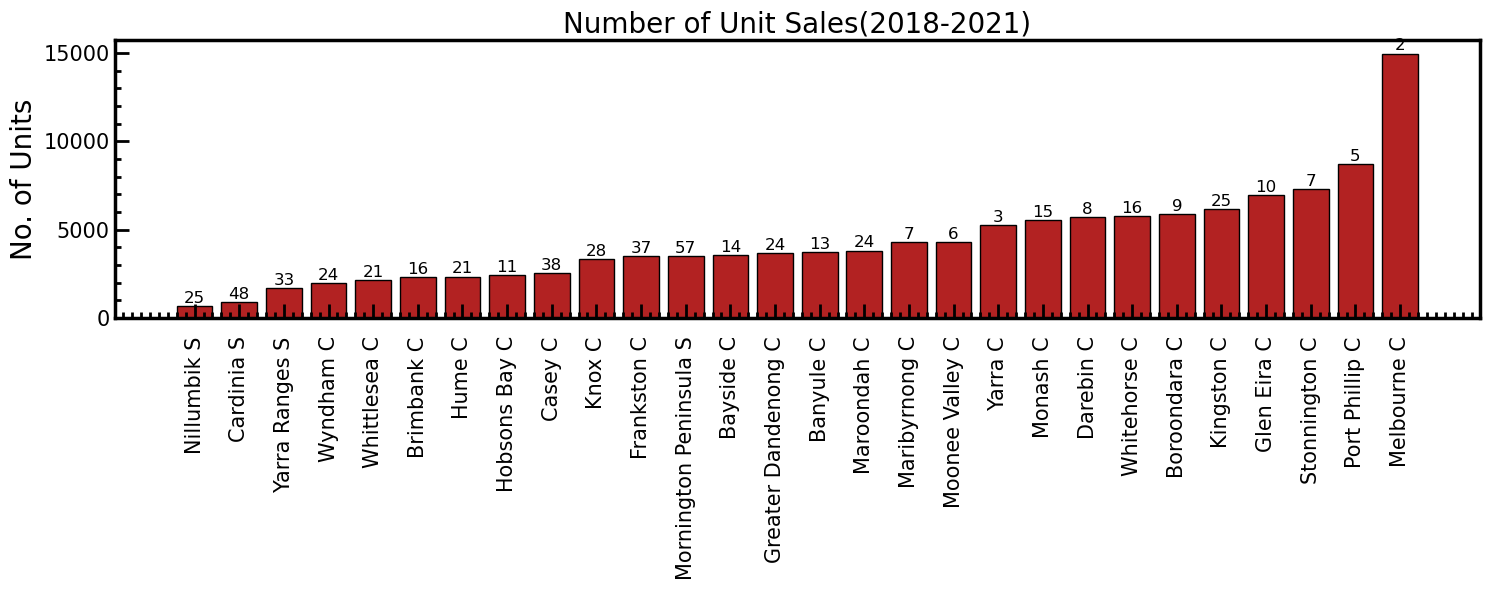

In [89]:
Combined =Combined .sort_values(by='TotalUnit', ascending=True)  

# Create a figure object
fig = plt.figure(figsize=(15,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)
x = Combined["City council"]
y = Combined["TotalUnit"]

# Create the bar plot
bars = ax.bar(x, y, color='firebrick', edgecolor='k', linewidth=1)

rects = ax.patches
labels = round(Combined["Distance"].astype(int))

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom", fontsize=12)
    

plt.title("Number of Unit Sales(2018-2021)",fontsize=20)
#plt.xlabel('Year', fontsize=20)
plt.ylabel('No. of Units', fontsize=20)

#plt.figure(figsize=(9,7))
plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.xticks(rotation=90)

# Show the plot
#plt.legend(loc="upper right", fontsize=15)
plt.tight_layout()
plt.savefig("Images/Unit0.png")
plt.show()

In [90]:
from matplotlib.colors import LinearSegmentedColormap
colors  = ['green', 'darkorange', 'firebrick'] 
cm      = LinearSegmentedColormap.from_list("Custom", colors, N=100)

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.50
plt.figure(figsize=(100,100))
m3 = Combined.hvplot.points(x='Stop_long', y='Stop_lat', geo = True, tiles = "OSM", marker='circle', size=Combined["TotalUnit"]/2, cmap=cm, color=Combined["TotalUnit"]/2, line_width=1,
                       xlim=(144.6, 145.51), ylim=(-37.55, -38.2), alpha=10000000.0, frame_height=1000, fontsize=18, xlabel="Longitude", ylabel="Latitude").opts(bgcolor="black") 
m3
#hvplot.save(m3, 'House1.png')
#hvplot.save(m1, 'Metro_hvplot.html')

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Stop_long,Stop_lat]   (_color,_size)

<Figure size 10000x10000 with 0 Axes>

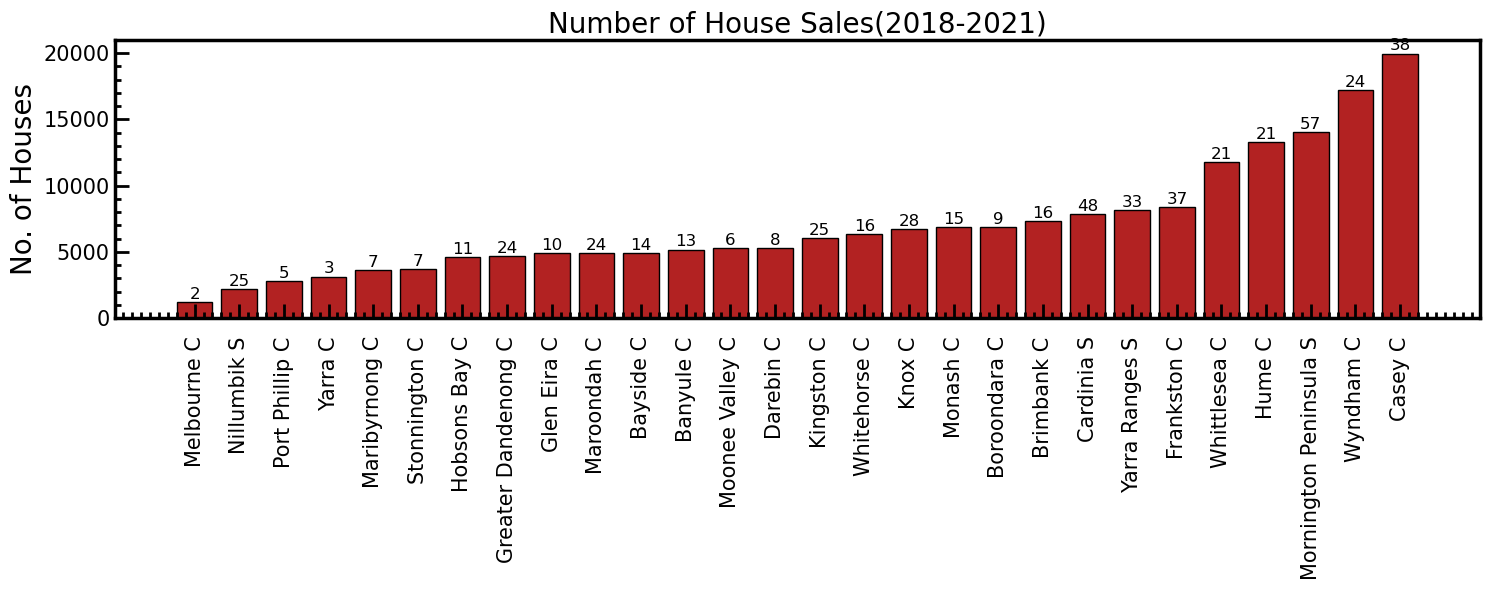

In [92]:
Combined =Combined.sort_values(by='TotalHouse', ascending=True)  

# Create a figure object
fig = plt.figure(figsize=(15,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

x = Combined["City council"]
y = Combined["TotalHouse"]
h = round(Combined["Distance"], -1)
# Create the bar plot
bars = ax.bar(x, y, color='firebrick', edgecolor='k', linewidth=1)


rects = ax.patches
labels = round(Combined["Distance"].astype(int))

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom", fontsize=12)
    

plt.title("Number of House Sales(2018-2021)",fontsize=20)
#plt.xlabel('Year', fontsize=20)
plt.ylabel('No. of Houses', fontsize=20)

#plt.figure(figsize=(9,7))
plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.xticks(rotation=90)

# Show the plot
#plt.legend(loc="upper right", fontsize=15)
plt.tight_layout()
plt.savefig("Images/House0.png")
plt.show()

In [93]:
from matplotlib.colors import LinearSegmentedColormap
colors  = ['green', 'darkorange', 'firebrick'] 
cm      = LinearSegmentedColormap.from_list("Custom", colors, N=100)

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 10.50
plt.figure(figsize=(100,100))
m4 = Combined.hvplot.points(x='Stop_long', y='Stop_lat', geo = True, tiles = "OSM", marker='circle', size=Combined["TotalHouse"]/2, cmap=cm, color=Combined["TotalHouse"]/2, line_width=1,
                       xlim=(144.6, 145.51), ylim=(-37.55, -38.2), alpha=10000000.0, frame_height=1000, fontsize=18, xlabel="Longitude", ylabel="Latitude").opts(bgcolor="black") 
m4
#hvplot.save(m1, 'Metro_hvplot.png')
#hvplot.save(m1, 'Metro_hvplot.html')

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Stop_long,Stop_lat]   (_color,_size)

<Figure size 10000x10000 with 0 Axes>

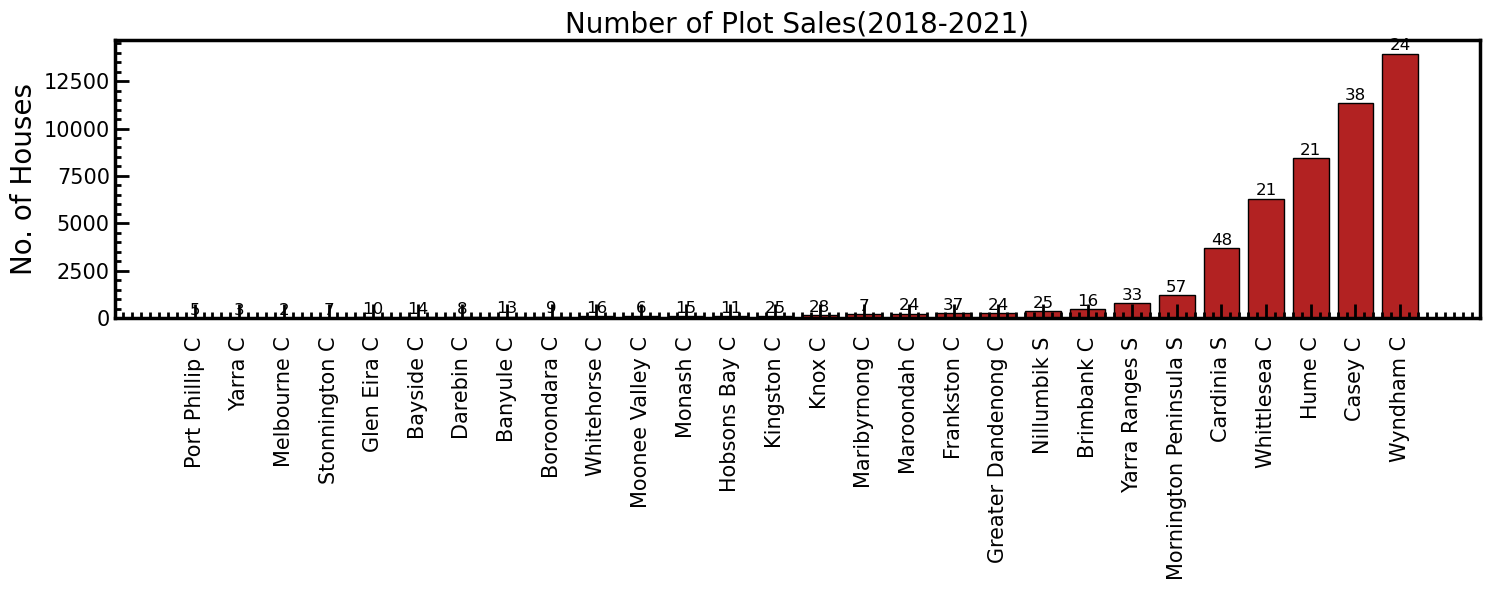

In [94]:
Combined =Combined.sort_values(by='TotalPlot', ascending=True)  

# Create a figure object
fig = plt.figure(figsize=(15,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

x = Combined["City council"]
y = Combined["TotalPlot"]
h = round(Combined["Distance"], -1)
# Create the bar plot
bars = ax.bar(x, y, color='firebrick', edgecolor='k', linewidth=1)


rects = ax.patches
labels = round(Combined["Distance"].astype(int))

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom", fontsize=12)
    

plt.title("Number of Plot Sales(2018-2021)",fontsize=20)
#plt.xlabel('Year', fontsize=20)
plt.ylabel('No. of Houses', fontsize=20)

#plt.figure(figsize=(9,7))
plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.xticks(rotation=90)

# Show the plot
#plt.legend(loc="upper right", fontsize=15)
plt.tight_layout()
plt.savefig("Images/Plot0.png")
plt.show()

In [95]:
from matplotlib.colors import LinearSegmentedColormap
colors  = ['green', 'darkorange', 'firebrick'] 
cm      = LinearSegmentedColormap.from_list("Custom", colors, N=100)

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 10.50
plt.figure(figsize=(100,100))
m5 = Combined.hvplot.points(x='Stop_long', y='Stop_lat', geo = True, tiles = "OSM", marker='circle', size=Combined["TotalPlot"]/2, cmap=cm, color=Combined["TotalPlot"]/2, line_width=1,
                       xlim=(144.6, 145.51), ylim=(-37.55, -38.2), alpha=10000000.0, frame_height=1000, fontsize=18, xlabel="Longitude", ylabel="Latitude").opts(bgcolor="black") 
m5
#hvplot.save(m1, 'Metro_hvplot.png')
#hvplot.save(m1, 'Metro_hvplot.html'

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Stop_long,Stop_lat]   (_color,_size)

<Figure size 10000x10000 with 0 Axes>

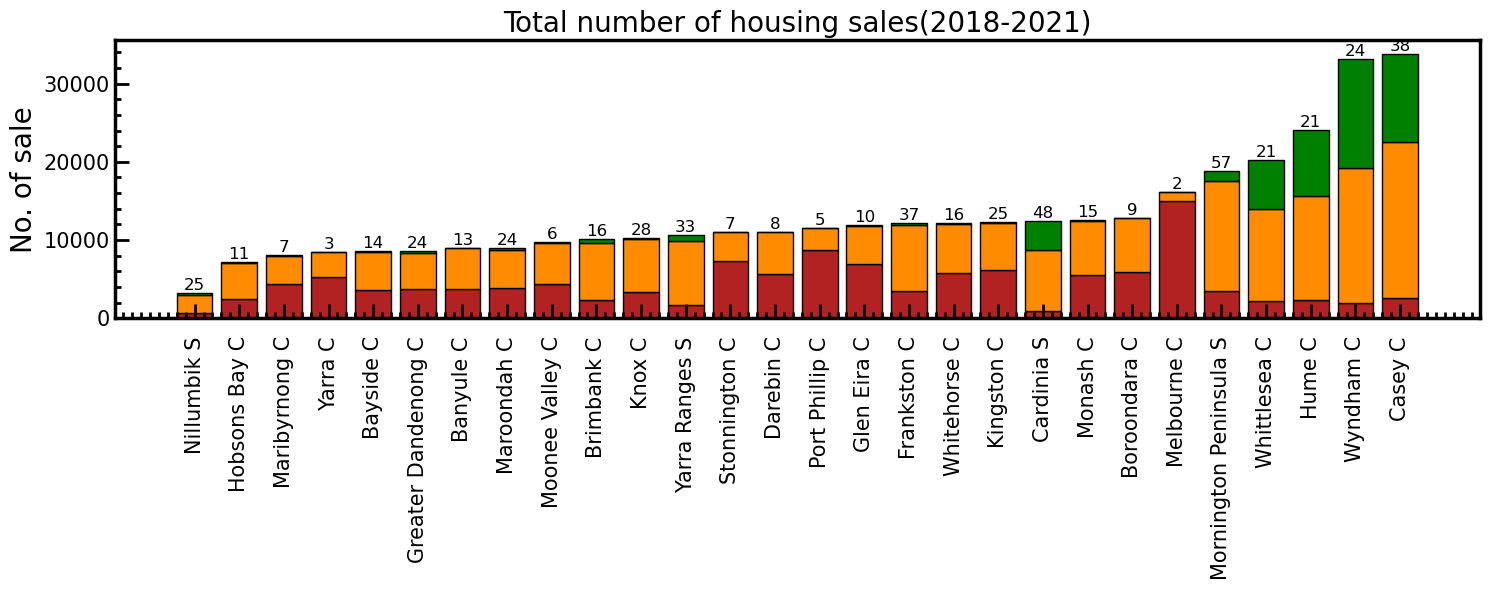

In [96]:
Combined =Combined .sort_values(by='Total', ascending=True)  

# Create a figure object
fig = plt.figure(figsize=(15,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

x = Combined["City council"]
y1 = Combined["TotalUnit"]
y2 = Combined["TotalHouse"]
y3 = Combined["TotalPlot"]

# Create the bar plot
ax.bar(x, y1, color='firebrick', edgecolor='k', linewidth=1)
ax.bar(x, y2, bottom=y1, color='darkorange', edgecolor='k', linewidth=1)
ax.bar(x, y3, bottom=y1+y2, color='green', edgecolor='k', linewidth=1)

rects = ax.patches
labels = round(Combined["Distance"].astype(int))
h      = Combined["Total"]

for rect, label, height in zip(rects, labels, h):
    #height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom", fontsize=12)
    
plt.title("Total number of housing sales(2018-2021)",fontsize=20)
#plt.xlabel('Year', fontsize=20)
plt.ylabel('No. of sale', fontsize=20)

#plt.figure(figsize=(9,7))
plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.xticks(rotation=90)

# Show the plot
#plt.legend(loc="upper right", fontsize=15)
plt.tight_layout()
plt.savefig("Images/Total0.png")
plt.show()

In [97]:
from matplotlib.colors import LinearSegmentedColormap
colors  = ['green', 'darkorange', 'firebrick'] 
cm      = LinearSegmentedColormap.from_list("Custom", colors, N=100)

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 10.50
plt.figure(figsize=(100,100))
m6 = Combined.hvplot.points(x='Stop_long', y='Stop_lat', geo = True, tiles = "OSM", marker='circle', size=Combined["Total"]/3, cmap=cm, color=Combined["Total"]/2, line_width=1,
                       xlim=(144.6, 145.51), ylim=(-37.55, -38.2), alpha=10000000.0, frame_height=1000, fontsize=18, xlabel="Longitude", ylabel="Latitude").opts(bgcolor="black") 
m6
#hvplot.save(m1, 'Metro_hvplot.png')
#hvplot.save(m1, 'Metro_hvplot.html'

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Stop_long,Stop_lat]   (_color,_size)

<Figure size 10000x10000 with 0 Axes>

In [98]:

import math
import glob
import shutil
import pandas
#import aplpy
import astropy
import numpy as np
import scipy.integrate
#import lmfit
import os
#from lmfit import Model
import astropy.units as u
from pylab import rcParams
from astropy.io import fits
from astropy.wcs import WCS
import scipy.stats as stats
from astropy.table import Table
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.optimize import curve_fit
from scipy.optimize import minimize_scalar
import matplotlib.patches as patches


In [99]:
# Defining a function of straight line

def linearFunc(x,intercept,slope):
    y = intercept + slope * x
    return y

In [100]:
Combined1       = Combined.loc[(Combined["City council"] != 'Frankston C  ')]
Combined1.to_csv("Resources/Combined1.csv")
Combined2       =pd.read_csv('Resources/Combined1.csv')
Combined2  

,Unnamed: 0,City council,Distance,Stop_lat,Stop_long,TotalAnnual,TotalAMPeak,TotalPMPeak,TotalWeekday,TotalWeekend,...,Plot20,Total20,Unit21,House21,Plot21,Total21,TotalUnit,TotalHouse,TotalPlot,Total
0,20,Nillumbik S,25.629336,-37.658888,145.177379,1676350.0,3050.0,1100.0,5900.0,5450.0,...,119,717,188,693,111,992,690,2223,363,3276
1,10,Hobsons Bay C,11.572842,-37.859288,144.847593,17216850.0,27300.0,10950.0,58800.0,52600.0,...,27,1499,824,1431,21,2276,2463,4581,113,7157
2,14,Maribyrnong C,7.113931,-37.804917,144.888091,23513450.0,29400.0,21150.0,78900.0,77250.0,...,56,1906,1235,1120,18,2373,4309,3611,216,8136
3,26,Yarra C,3.099026,-37.808771,144.994970,38622700.0,20200.0,61800.0,125150.0,140750.0,...,2,1644,1512,1087,2,2601,5262,3141,8,8411
4,1,Bayside C,14.183177,-37.938111,145.019598,19655550.0,28450.0,13250.0,63400.0,70800.0,...,15,1821,1093,1511,12,2616,3544,4944,42,8530
5,6,Greater Dandenong C,24.980748,-37.968294,145.178908,18560600.0,20300.0,17550.0,63450.0,61500.0,...,71,1695,1289,1506,55,2850,3680,4690,280,8650
6,0,Banyule C,13.392110,-37.737717,145.079519,16823150.0,26600.0,13450.0,59200.0,49850.0,...,19,1861,1151,1599,18,2768,3739,5178,82,8999
7,15,Maroondah C,24.315331,-37.814102,145.243420,13461350.0,18300.0,10350.0,44850.0,44800.0,...,64,1838,1266,1501,74,2841,3823,4936,242,9001
8,18,Moonee Valley C,6.925495,-37.766185,144.924819,17851900.0,26850.0,13350.0,60050.0,58650.0,...,31,1970,1229,1774,26,3029,4326,5280,102,9708
9,3,Brimbank C,16.208247,-37.749828,144.805854,19624650.0,29200.0,10750.0,66650.0,60750.0,...,149,2024,761,2250,111,3122,2317,7337,478,10132


In [101]:
Combined3       = Combined2.loc[(Combined2["City council"] != 'Melbourne C  ')]
Combined3
Combined3.to_csv("Resources/Combined3.csv")
Combined4       =pd.read_csv('Resources/Combined3.csv')
Combined4  

,Unnamed: 0.1,Unnamed: 0,City council,Distance,Stop_lat,Stop_long,TotalAnnual,TotalAMPeak,TotalPMPeak,TotalWeekday,...,Plot20,Total20,Unit21,House21,Plot21,Total21,TotalUnit,TotalHouse,TotalPlot,Total
0,0,20,Nillumbik S,25.629336,-37.658888,145.177379,1676350.0,3050.0,1100.0,5900.0,...,119,717,188,693,111,992,690,2223,363,3276
1,1,10,Hobsons Bay C,11.572842,-37.859288,144.847593,17216850.0,27300.0,10950.0,58800.0,...,27,1499,824,1431,21,2276,2463,4581,113,7157
2,2,14,Maribyrnong C,7.113931,-37.804917,144.888091,23513450.0,29400.0,21150.0,78900.0,...,56,1906,1235,1120,18,2373,4309,3611,216,8136
3,3,26,Yarra C,3.099026,-37.808771,144.994970,38622700.0,20200.0,61800.0,125150.0,...,2,1644,1512,1087,2,2601,5262,3141,8,8411
4,4,1,Bayside C,14.183177,-37.938111,145.019598,19655550.0,28450.0,13250.0,63400.0,...,15,1821,1093,1511,12,2616,3544,4944,42,8530
5,5,6,Greater Dandenong C,24.980748,-37.968294,145.178908,18560600.0,20300.0,17550.0,63450.0,...,71,1695,1289,1506,55,2850,3680,4690,280,8650
6,6,0,Banyule C,13.392110,-37.737717,145.079519,16823150.0,26600.0,13450.0,59200.0,...,19,1861,1151,1599,18,2768,3739,5178,82,8999
7,7,15,Maroondah C,24.315331,-37.814102,145.243420,13461350.0,18300.0,10350.0,44850.0,...,64,1838,1266,1501,74,2841,3823,4936,242,9001
8,8,18,Moonee Valley C,6.925495,-37.766185,144.924819,17851900.0,26850.0,13350.0,60050.0,...,31,1970,1229,1774,26,3029,4326,5280,102,9708
9,9,3,Brimbank C,16.208247,-37.749828,144.805854,19624650.0,29200.0,10750.0,66650.0,...,149,2024,761,2250,111,3122,2317,7337,478,10132


The coorelation between Total weekday footfall Vs Total unit sold:
The slope = 32.56227285562437, with uncertainty 5.633996852461808
The intercept = -59823.82907029209, with uncertainty 29688.514170782484

The coorelation between Total weekday footfall Vs Total unit sold:
The slope = 5.2904060141256455, with uncertainty 3.2606399291759436
The intercept = 39986.346463021524, with uncertainty 14661.636549292407



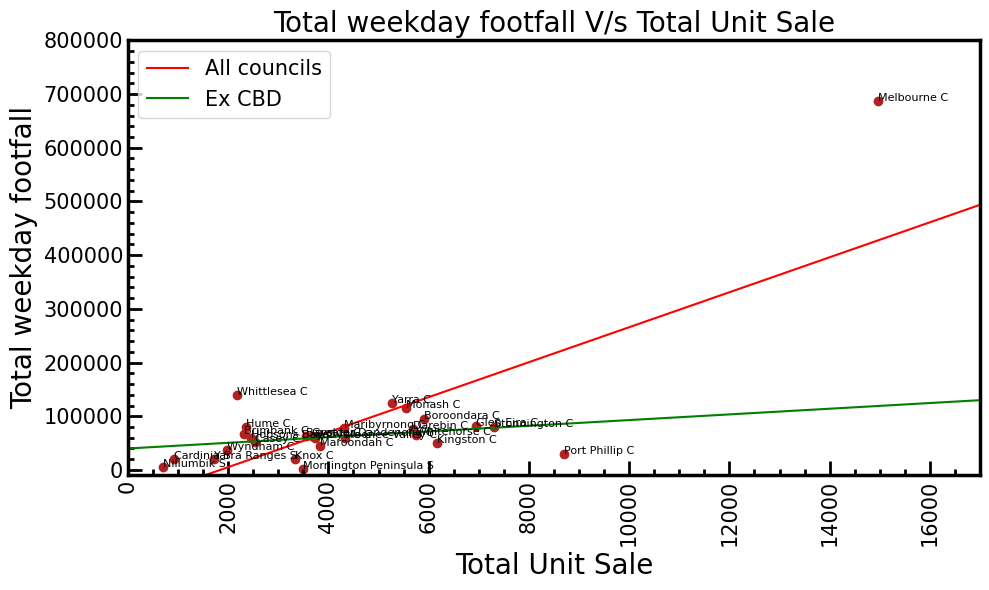

In [103]:
c  = Combined2["City council"]

x2 = Combined2["TotalUnit"]
y2 = Combined2["TotalWeekday"]

fit2,cov2  = curve_fit(linearFunc,x2,y2)
inter2     = fit2[0]
slope2     = fit2[1]
dinter2    = np.sqrt(cov2[0][0])
dslope2    = np.sqrt(cov2[1][1])

print(f'The coorelation between Total weekday footfall Vs Total unit sold:')
print(f'The slope = {slope2}, with uncertainty {dslope2}')
print(f'The intercept = {inter2}, with uncertainty {dinter2}\n')

x4 = Combined4["TotalUnit"]
y4 = Combined4["TotalWeekday"]

fit4,cov4  = curve_fit(linearFunc,x4,y4)
inter4     = fit4[0]
slope4     = fit4[1]
dinter4    = np.sqrt(cov4[0][0])
dslope4    = np.sqrt(cov4[1][1])

print(f'The coorelation between Total weekday footfall Vs Total unit sold:')
print(f'The slope = {slope4}, with uncertainty {dslope4}')
print(f'The intercept = {inter4}, with uncertainty {dinter4}\n')

# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

#ax   = fig.add_subplot(111)
x   = np.linspace(-1000.0, 25000.0, 20000)
        
ax.scatter(x2,y2,color='firebrick')
plt.plot(x, linearFunc(x, inter2, slope2), c='r', linestyle='-', label='All councils')
plt.plot(x, linearFunc(x, inter4, slope4), c='g', linestyle='-', label='Ex CBD')

for i, txt in enumerate(c):
    ax.annotate(txt, (x2[i], y2[i]), fontsize=8)
    
plt.title("Total weekday footfall V/s Total Unit Sale",fontsize=20)
plt.xlabel("Total Unit Sale", fontsize=20)
plt.ylabel('Total weekday footfall', fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
plt.ylim(-10000,800000)
plt.xlim(0,17000)
plt.xticks(rotation=90)

plt.legend(loc="upper left", fontsize=15)
plt.tight_layout()
plt.savefig("Images/Unit2.png")
plt.show()

The coorelation between Total weekday footfall Vs Total house sold:
The slope = -7.463080507673649, with uncertainty 5.324932030410908
The intercept = 136693.80120721392, with uncertainty 44127.08285221365

The coorelation between Total weekday footfall Vs Total house sold:
The slope = -0.690818679031105, with uncertainty 1.566028153378208
The intercept = 66274.24932426095, with uncertainty 13219.558158027363



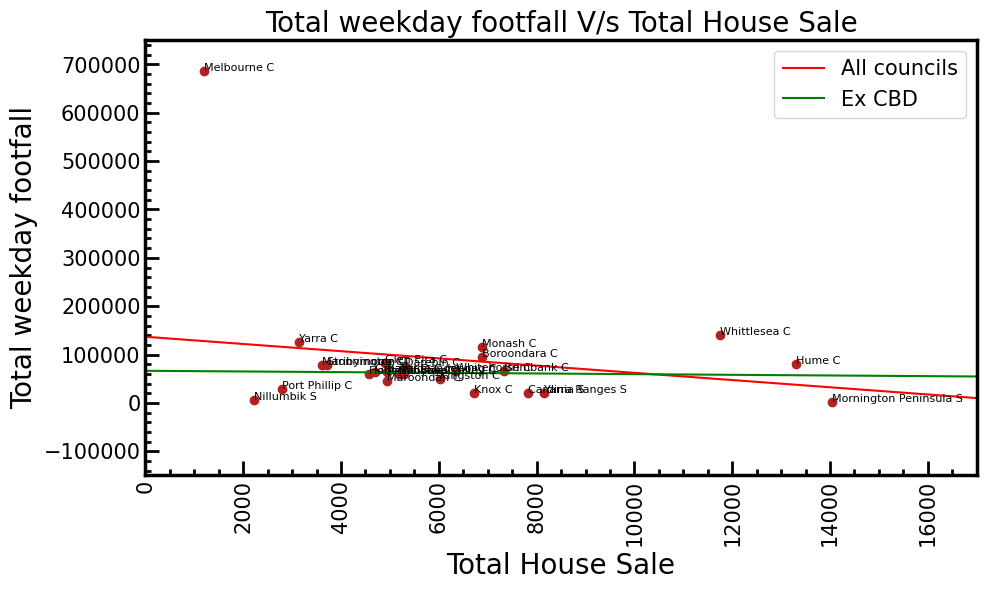

In [104]:
c  = Combined2["City council"]

x2 = Combined2["TotalHouse"]
y2 = Combined2["TotalWeekday"]

fit2,cov2  = curve_fit(linearFunc,x2,y2)
inter2     = fit2[0]
slope2     = fit2[1]
dinter2    = np.sqrt(cov2[0][0])
dslope2    = np.sqrt(cov2[1][1])

print(f'The coorelation between Total weekday footfall Vs Total house sold:')
print(f'The slope = {slope2}, with uncertainty {dslope2}')
print(f'The intercept = {inter2}, with uncertainty {dinter2}\n')

x4 = Combined4["TotalHouse"]
y4 = Combined4["TotalWeekday"]

fit4,cov4  = curve_fit(linearFunc,x4,y4)
inter4     = fit4[0]
slope4     = fit4[1]
dinter4    = np.sqrt(cov4[0][0])
dslope4    = np.sqrt(cov4[1][1])

print(f'The coorelation between Total weekday footfall Vs Total house sold:')
print(f'The slope = {slope4}, with uncertainty {dslope4}')
print(f'The intercept = {inter4}, with uncertainty {dinter4}\n')

# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

#ax   = fig.add_subplot(111)
x   = np.linspace(-1000.0, 25000.0, 20000)
        
ax.scatter(x2,y2,color='firebrick')
plt.plot(x, linearFunc(x, inter2, slope2), c='r', linestyle='-', label='All councils')
plt.plot(x, linearFunc(x, inter4, slope4), c='g', linestyle='-', label='Ex CBD')

for i, txt in enumerate(c):
    ax.annotate(txt, (x2[i], y2[i]), fontsize=8)
    
plt.title("Total weekday footfall V/s Total House Sale",fontsize=20)
plt.xlabel("Total House Sale", fontsize=20)
plt.ylabel('Total weekday footfall', fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
plt.ylim(-150000,750000)
plt.xlim(0,17000)
plt.xticks(rotation=90)

plt.legend(loc="upper right", fontsize=15)
plt.tight_layout()
plt.savefig("Images/House2.png")
plt.show()

The coorelation between Total weekday footfall Vs Total plot sold:
The slope = -3.1663987872148844, with uncertainty 6.654683224707072
The intercept = 90150.37163346831, with uncertainty 27199.177065693588

The coorelation between Total weekday footfall Vs Total plot sold:
The slope = -0.10529633085304213, with uncertainty 1.8455400539430005
The intercept = 61482.51518268003, with uncertainty 7686.8240206214405



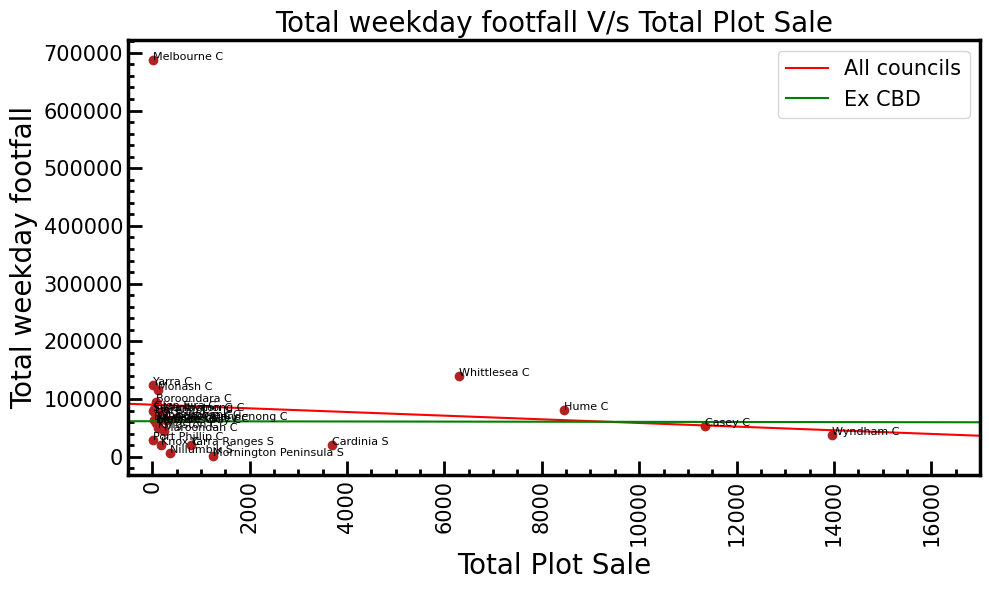

In [105]:
c  = Combined2["City council"]

x2 = Combined2["TotalPlot"]
y2 = Combined2["TotalWeekday"]

fit2,cov2  = curve_fit(linearFunc,x2,y2)
inter2     = fit2[0]
slope2     = fit2[1]
dinter2    = np.sqrt(cov2[0][0])
dslope2    = np.sqrt(cov2[1][1])

print(f'The coorelation between Total weekday footfall Vs Total plot sold:')
print(f'The slope = {slope2}, with uncertainty {dslope2}')
print(f'The intercept = {inter2}, with uncertainty {dinter2}\n')

x4 = Combined4["TotalPlot"]
y4 = Combined4["TotalWeekday"]

fit4,cov4  = curve_fit(linearFunc,x4,y4)
inter4     = fit4[0]
slope4     = fit4[1]
dinter4    = np.sqrt(cov4[0][0])
dslope4    = np.sqrt(cov4[1][1])

print(f'The coorelation between Total weekday footfall Vs Total plot sold:')
print(f'The slope = {slope4}, with uncertainty {dslope4}')
print(f'The intercept = {inter4}, with uncertainty {dinter4}\n')

# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

#ax   = fig.add_subplot(111)
x   = np.linspace(-1000.0, 25000.0, 20000)
        
ax.scatter(x2,y2,color='firebrick')
plt.plot(x, linearFunc(x, inter2, slope2), c='r', linestyle='-', label='All councils')
plt.plot(x, linearFunc(x, inter4, slope4), c='g', linestyle='-', label='Ex CBD')

for i, txt in enumerate(c):
    ax.annotate(txt, (x2[i], y2[i]), fontsize=8)
    
plt.title("Total weekday footfall V/s Total Plot Sale",fontsize=20)
plt.xlabel("Total Plot Sale", fontsize=20)
plt.ylabel('Total weekday footfall', fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-150000,750000)
plt.xlim(-500,17000)
plt.xticks(rotation=90)

plt.legend(loc="upper right", fontsize=15)
plt.tight_layout()
plt.savefig("Images/Plot2.png")
plt.show()

The coorelation between Total weekday footfall Vs Total sold:
The slope = 1.501155004655529, with uncertainty 3.4631796096317355
The intercept = 64627.025766011226, with uncertainty 51912.16722125933

The coorelation between Total weekday footfall Vs Total sold:
The slope = -0.10529633085304213, with uncertainty 1.8455400539430005
The intercept = 61482.51518268003, with uncertainty 7686.8240206214405



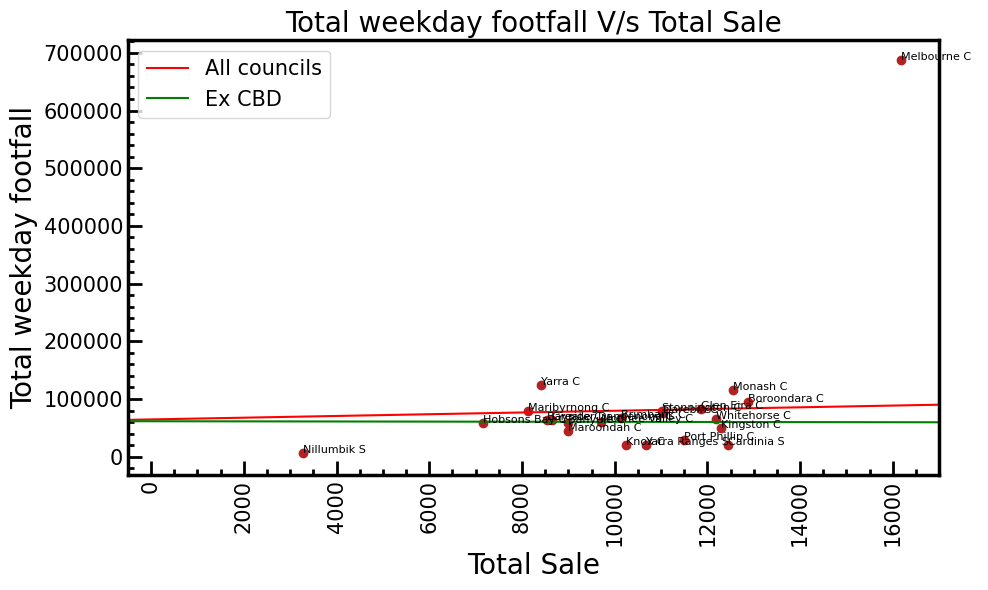

In [108]:
c  = Combined2["City council"]

x2 = Combined2["Total"]
y2 = Combined2["TotalWeekday"]

fit2,cov2  = curve_fit(linearFunc,x2,y2)
inter2     = fit2[0]
slope2     = fit2[1]
dinter2    = np.sqrt(cov2[0][0])
dslope2    = np.sqrt(cov2[1][1])

print(f'The coorelation between Total weekday footfall Vs Total sold:')
print(f'The slope = {slope2}, with uncertainty {dslope2}')
print(f'The intercept = {inter2}, with uncertainty {dinter2}\n')

x4 = Combined4["TotalPlot"]
y4 = Combined4["TotalWeekday"]

fit4,cov4  = curve_fit(linearFunc,x4,y4)
inter4     = fit4[0]
slope4     = fit4[1]
dinter4    = np.sqrt(cov4[0][0])
dslope4    = np.sqrt(cov4[1][1])

print(f'The coorelation between Total weekday footfall Vs Total sold:')
print(f'The slope = {slope4}, with uncertainty {dslope4}')
print(f'The intercept = {inter4}, with uncertainty {dinter4}\n')

# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

#ax   = fig.add_subplot(111)
x   = np.linspace(-1000.0, 25000.0, 20000)
        
ax.scatter(x2,y2,color='firebrick')
plt.plot(x, linearFunc(x, inter2, slope2), c='r', linestyle='-', label='All councils')
plt.plot(x, linearFunc(x, inter4, slope4), c='g', linestyle='-', label='Ex CBD')

for i, txt in enumerate(c):
    ax.annotate(txt, (x2[i], y2[i]), fontsize=8)
    
plt.title("Total weekday footfall V/s Total Sale",fontsize=20)
plt.xlabel("Total Sale", fontsize=20)
plt.ylabel('Total weekday footfall', fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-150000,750000)
plt.xlim(-500,17000)
plt.xticks(rotation=90)

plt.legend(loc="upper left", fontsize=15)
plt.tight_layout()
plt.savefig("Images/Total2.png")
plt.show()

In [ ]:
#Checking if there is any correlation between Total Annual and Total number of sales:

c = Combined4["City council"]
x = Combined4["TotalUnit"]
y = Combined4["TotalWeekday"]

fit1,cov1  = curve_fit(linearFunc,x,y)
inter1     = fit1[0]
slope1     = fit1[1]
dinter1    = np.sqrt(cov1[0][0])
dslope1    = np.sqrt(cov1[1][1])

print(f'TIR-radio correlation for star forming galaxies (all):')
print(f'The slope = {slope1}, with uncertainty {dslope1}')
print(f'The intercept = {inter1}, with uncertainty {dinter1}\n')

# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

#ax   = fig.add_subplot(111)
x1   = np.linspace(1000.0, 25000.0, 20000)
        
ax.scatter(x,y,color='firebrick')

plt.plot(x1, linearFunc(x1, inter1, slope1), c='r', linestyle='-', label='This work / Condon et al. 2002')
for i, txt in enumerate(c):
    ax.annotate(txt, (x[i], y[i]), fontsize=8)

plt.title("Total weekday footfall V/s Total Unit Sale",fontsize=20)
plt.xlabel("Total Unit Sale", fontsize=20)
plt.ylabel('Total weekday footfall', fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(1000,21000)
plt.xticks(rotation=90)

#plt.legend(loc="upper right", fontsize=15)
plt.tight_layout()
plt.savefig("Unit2.png")
plt.show()

In [ ]:
#Checking if there is any correlation between Total Annual and Total number of sales:

c = Combined2["City council"]
x = Combined2["TotalHouse"]
y = Combined2["TotalWeekday"]

fit1,cov1  = curve_fit(linearFunc,x,y)
inter1     = fit1[0]
slope1     = fit1[1]
dinter1    = np.sqrt(cov1[0][0])
dslope1    = np.sqrt(cov1[1][1])

print(f'TIR-radio correlation for star forming galaxies (all):')
print(f'The slope = {slope1}, with uncertainty {dslope1}')
print(f'The intercept = {inter1}, with uncertainty {dinter1}\n')

# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

#ax   = fig.add_subplot(111)
x1   = np.linspace(1000.0, 25000.0, 20000)
        
ax.scatter(x,y,color='firebrick')

plt.plot(x1, linearFunc(x1, inter1, slope1), c='r', linestyle='-', label='This work / Condon et al. 2002')
for i, txt in enumerate(c):
    ax.annotate(txt, (x[i], y[i]), fontsize=8)

plt.title("Total weekday footfall V/s Total House Sale",fontsize=20)
plt.xlabel("Total House Sale", fontsize=20)
plt.ylabel('Total weekday footfall', fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(1000,21000)
plt.xticks(rotation=90)

#plt.legend(loc="upper right", fontsize=15)
plt.tight_layout()
plt.savefig("Unit2.png")
plt.show()

In [ ]:
#Checking if there is any correlation between Total Annual and Total number of sales:

c = Combined4["City council"]
x = Combined4["TotalHouse"]
y = Combined4["TotalWeekday"]

fit1,cov1  = curve_fit(linearFunc,x,y)
inter1     = fit1[0]
slope1     = fit1[1]
dinter1    = np.sqrt(cov1[0][0])
dslope1    = np.sqrt(cov1[1][1])

print(f'TIR-radio correlation for star forming galaxies (all):')
print(f'The slope = {slope1}, with uncertainty {dslope1}')
print(f'The intercept = {inter1}, with uncertainty {dinter1}\n')

# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

#ax   = fig.add_subplot(111)
x1   = np.linspace(1000.0, 25000.0, 20000)
        
ax.scatter(x,y,color='firebrick')

plt.plot(x1, linearFunc(x1, inter1, slope1), c='r', linestyle='-', label='This work / Condon et al. 2002')
for i, txt in enumerate(c):
    ax.annotate(txt, (x[i], y[i]), fontsize=8)

plt.title("Total weekday footfall V/s Total House Sale",fontsize=20)
plt.xlabel("Total House Sale", fontsize=20)
plt.ylabel('Total weekday footfall', fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(1000,21000)
plt.xticks(rotation=90)

#plt.legend(loc="upper right", fontsize=15)
plt.tight_layout()
plt.savefig("Unit2.png")
plt.show()

In [ ]:
#Checking if there is any correlation between Total Annual and Total number of sales:

c = Combined2["City council"]
x = Combined2["TotalPlot"]
y = Combined2["TotalWeekday"]

fit1,cov1  = curve_fit(linearFunc,x,y)
inter1     = fit1[0]
slope1     = fit1[1]
dinter1    = np.sqrt(cov1[0][0])
dslope1    = np.sqrt(cov1[1][1])

print(f'TIR-radio correlation for star forming galaxies (all):')
print(f'The slope = {slope1}, with uncertainty {dslope1}')
print(f'The intercept = {inter1}, with uncertainty {dinter1}\n')

# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

#ax   = fig.add_subplot(111)
x1   = np.linspace(1000.0, 25000.0, 20000)
        
ax.scatter(x,y,color='firebrick')

plt.plot(x1, linearFunc(x1, inter1, slope1), c='r', linestyle='-', label='This work / Condon et al. 2002')
for i, txt in enumerate(c):
    ax.annotate(txt, (x[i], y[i]), fontsize=8)

plt.title("Total weekday footfall V/s Total Plot Sale",fontsize=20)
plt.xlabel("Total Plot Sale", fontsize=20)
plt.ylabel('Total weekday footfall', fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(1000,21000)
plt.xticks(rotation=90)

#plt.legend(loc="upper right", fontsize=15)
plt.tight_layout()
plt.savefig("Unit2.png")
plt.show()

In [ ]:
#Checking if there is any correlation between Total Annual and Total number of sales:

c = Combined4["City council"]
x = Combined4["TotalPlot"]
y = Combined4["TotalWeekday"]

fit1,cov1  = curve_fit(linearFunc,x,y)
inter1     = fit1[0]
slope1     = fit1[1]
dinter1    = np.sqrt(cov1[0][0])
dslope1    = np.sqrt(cov1[1][1])

print(f'TIR-radio correlation for star forming galaxies (all):')
print(f'The slope = {slope1}, with uncertainty {dslope1}')
print(f'The intercept = {inter1}, with uncertainty {dinter1}\n')

# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

#ax   = fig.add_subplot(111)
x1   = np.linspace(1000.0, 25000.0, 20000)
        
ax.scatter(x,y,color='firebrick')

plt.plot(x1, linearFunc(x1, inter1, slope1), c='r', linestyle='-', label='This work / Condon et al. 2002')
for i, txt in enumerate(c):
    ax.annotate(txt, (x[i], y[i]), fontsize=8)

plt.title("Total weekday footfall V/s Total Plot Sale",fontsize=20)
plt.xlabel("Total Plot Sale", fontsize=20)
plt.ylabel('Total weekday footfall', fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(1000,21000)
plt.xticks(rotation=90)

#plt.legend(loc="upper right", fontsize=15)
plt.tight_layout()
plt.savefig("Unit2.png")
plt.show()

In [ ]:
#Checking if there is any correlation between Total Annual and Total number of sales:

c = Combined2["City council"]
x = Combined2["Total"]
y = Combined2["TotalWeekday"]

fit1,cov1  = curve_fit(linearFunc,x,y)
inter1     = fit1[0]
slope1     = fit1[1]
dinter1    = np.sqrt(cov1[0][0])
dslope1    = np.sqrt(cov1[1][1])

print(f'TIR-radio correlation for star forming galaxies (all):')
print(f'The slope = {slope1}, with uncertainty {dslope1}')
print(f'The intercept = {inter1}, with uncertainty {dinter1}\n')

# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

#ax   = fig.add_subplot(111)
x1   = np.linspace(1000.0, 35000.0, 20000)
        
ax.scatter(x,y,color='firebrick')

plt.plot(x1, linearFunc(x1, inter1, slope1), c='r', linestyle='-', label='This work / Condon et al. 2002')
for i, txt in enumerate(c):
    ax.annotate(txt, (x[i], y[i]), fontsize=8)

plt.title("Total weekday footfall V/s Total Sale",fontsize=20)
plt.xlabel("Total Sale", fontsize=20)
plt.ylabel('Total weekday footfall', fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(1000,21000)
plt.xticks(rotation=90)

#plt.legend(loc="upper right", fontsize=15)
plt.tight_layout()
plt.savefig("Unit2.png")
plt.show()

In [ ]:
#Checking if there is any correlation between Total Annual and Total number of sales:

c = Combined4["City council"]
x = Combined4["Total"]
y = Combined4["TotalWeekday"]

fit1,cov1  = curve_fit(linearFunc,x,y)
inter1     = fit1[0]
slope1     = fit1[1]
dinter1    = np.sqrt(cov1[0][0])
dslope1    = np.sqrt(cov1[1][1])

print(f'TIR-radio correlation for star forming galaxies (all):')
print(f'The slope = {slope1}, with uncertainty {dslope1}')
print(f'The intercept = {inter1}, with uncertainty {dinter1}\n')

# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

#ax   = fig.add_subplot(111)
x1   = np.linspace(1000.0, 35000.0, 20000)
        
ax.scatter(x,y,color='firebrick')

plt.plot(x1, linearFunc(x1, inter1, slope1), c='r', linestyle='-', label='This work / Condon et al. 2002')
for i, txt in enumerate(c):
    ax.annotate(txt, (x[i], y[i]), fontsize=8)

plt.title("Total weekday footfall V/s Total Sale",fontsize=20)
plt.xlabel("Total Sale", fontsize=20)
plt.ylabel('Total weekday footfall', fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(1000,21000)
plt.xticks(rotation=90)

#plt.legend(loc="upper right", fontsize=15)
plt.tight_layout()
plt.savefig("Unit2.png")
plt.show()

In [ ]:
#Checking if there is any correlation between Total Annual and Total number of sales:

c = Combined4["City council"]
x = Combined4["TotalUnit"]
y = Combined4["WeekdayIncrease(%)"]
#y = Combined4["TotalWeekend"]

fit1,cov1  = curve_fit(linearFunc,x,y)
inter1     = fit1[0]
slope1     = fit1[1]
dinter1    = np.sqrt(cov1[0][0])
dslope1    = np.sqrt(cov1[1][1])

print(f'TIR-radio correlation for star forming galaxies (all):')
print(f'The slope = {slope1}, with uncertainty {dslope1}')
print(f'The intercept = {inter1}, with uncertainty {dinter1}\n')

# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

#ax   = fig.add_subplot(111)
x1   = np.linspace(1000.0, 35000.0, 20000)
        
ax.scatter(x,y,color='firebrick')

plt.plot(x1, linearFunc(x1, inter1, slope1), c='r', linestyle='-', label='This work / Condon et al. 2002')
for i, txt in enumerate(c):
    ax.annotate(txt, (x[i], y[i]), fontsize=8)

plt.title("Total WeekdayIncrease(%) V/s Total Sale",fontsize=20)
plt.xlabel("Total Sale", fontsize=20)
plt.ylabel('Total WeekdayIncrease(%)', fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(1000,21000)
plt.xticks(rotation=90)

#plt.legend(loc="upper right", fontsize=15)
plt.tight_layout()
plt.savefig("Unit2.png")
plt.show()

In [ ]:
WeekdayIncrease(%